In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
     | 133.1 MB 102.3 MB/s
     |████████████████████████████████| 6.3 MB 5.0 MB/s 
     |████████████████████████████████| 219 kB 56.3 MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759602 sha256=a6eae4f0befd51dbd4d68b7150a52dfa786c95d659ff12c7e8a650761a9085b6
  Stored in directory: /tmp/pip-ephem-wheel-cache-1h2g4_qr/wheels/98/1a/9d/de6aa4dee52d726996be77bb4a65cf03865288bfc35e5b24d8
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-a

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as fig_fact
# plotly.tools.set_config_file(world_readable=True, sharing='public')
import plotly
import plotly.offline as py
from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins as plugins

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving city_day.csv to city_day.csv


In [ ]:
df=pd.read_csv('city_day.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
print(df.shape)
df['Date']=pd.to_datetime(df['Date'])
print(df['Date'].dtype)

(29531, 16)
datetime64[ns]


In [ ]:
print(df.isna().sum())
x=list(df.columns)[2:]
print(df.shape)
df = df.dropna( how='all',
                    subset=x)
print(list(df.columns)[2:])
print(df.shape)

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64
(29531, 16)
['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']
(28157, 16)


In [ ]:
df=df.drop(columns=['Xylene'])
#Xylene had a lot of missing values. It's better to just not consider it in the evaluation

Find outliers in PM10 column of the dataset

           City       Date   PM2.5    PM10  ...  Benzene  Toluene  AQI  AQI_Bucket
14156  Guwahati 2019-05-04  916.67  1000.0  ...    86.24      NaN  NaN         NaN

[1 rows x 15 columns]


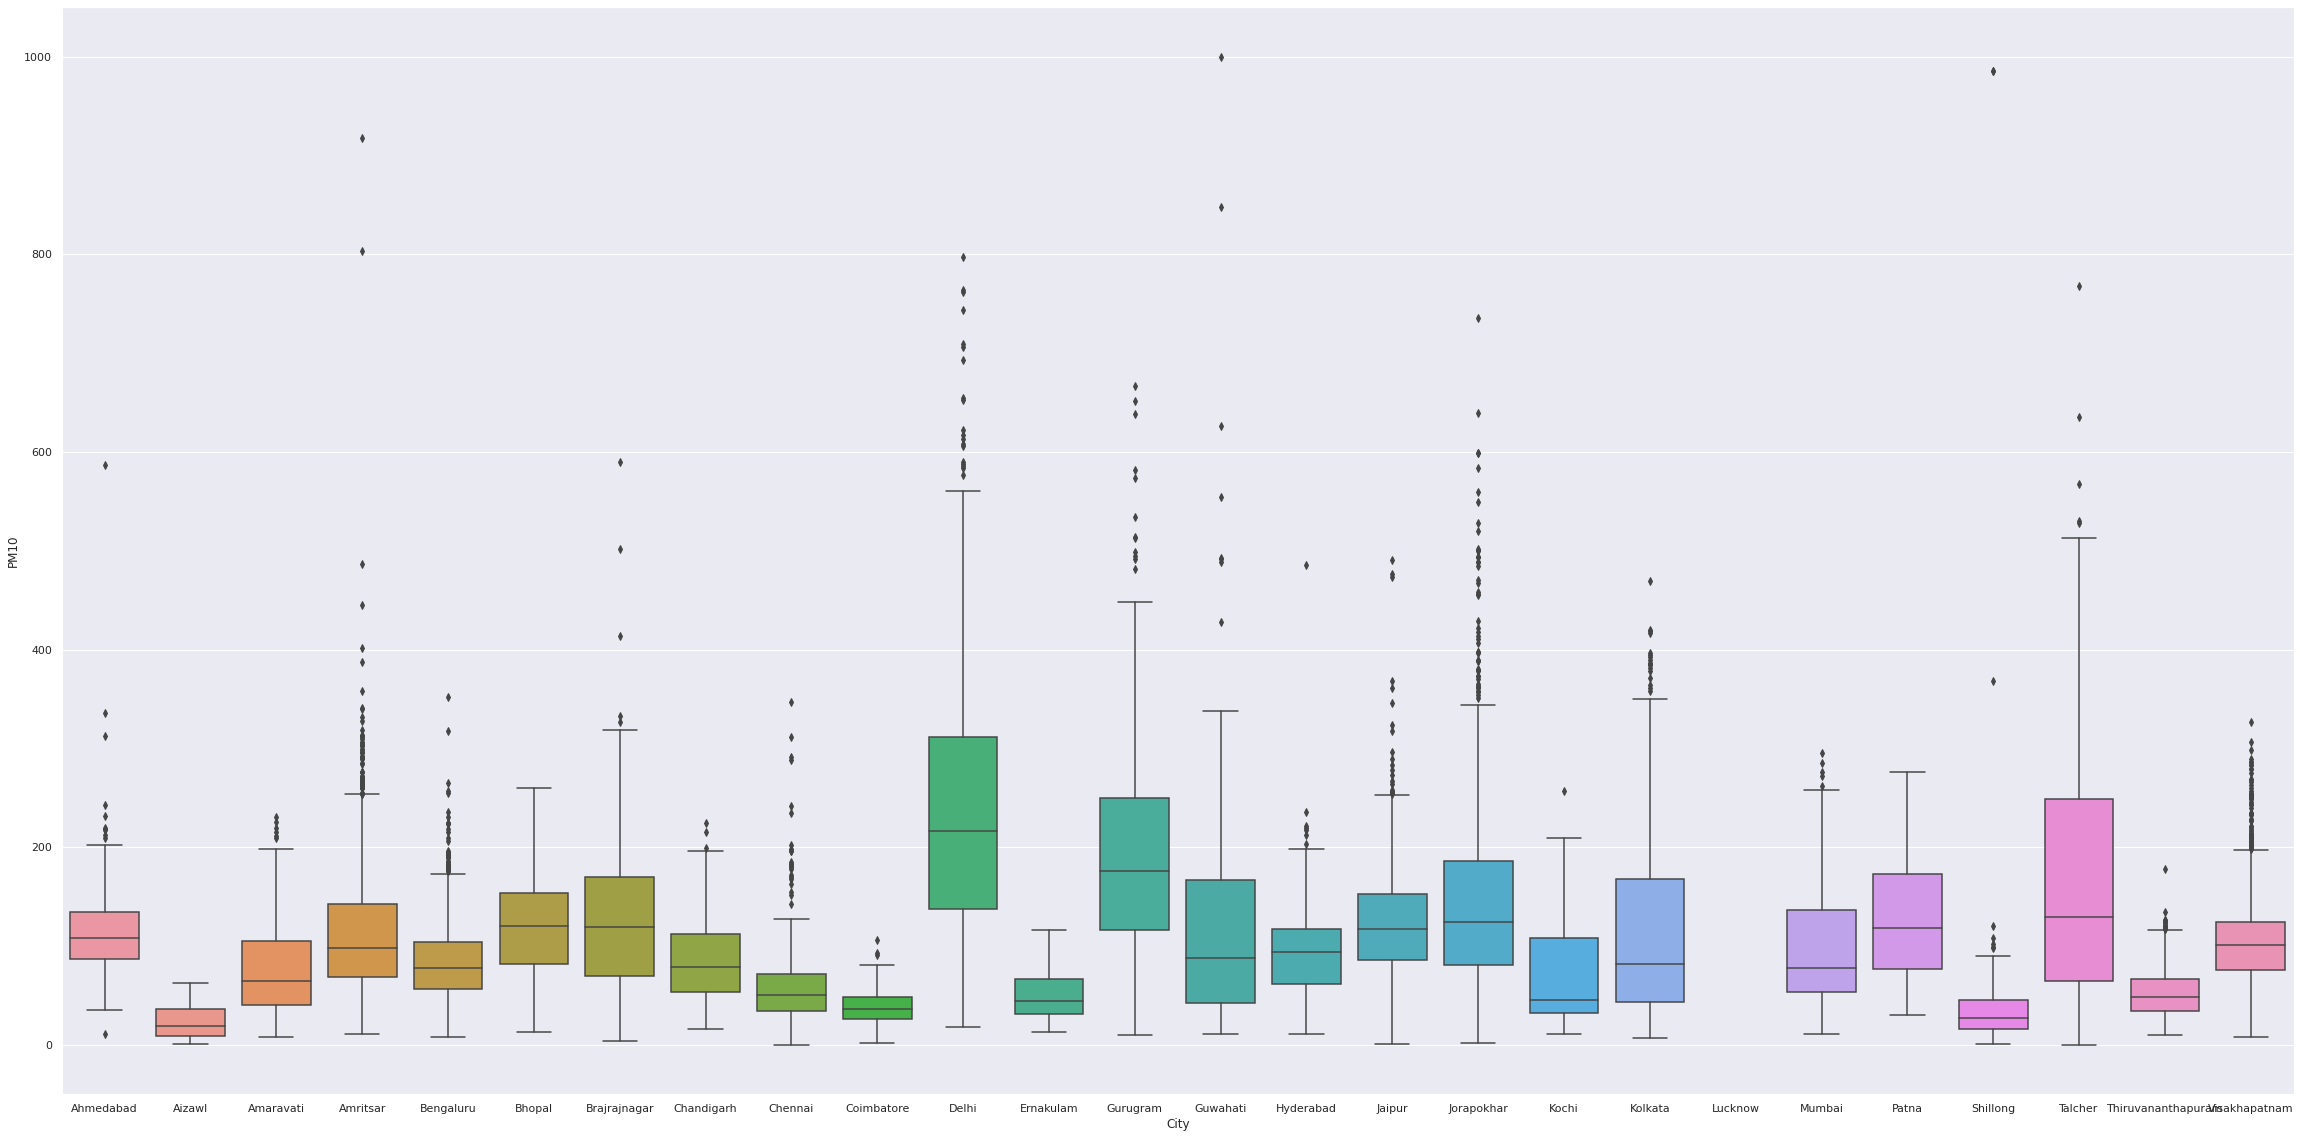

In [ ]:
sns.set(rc={'figure.figsize':(40,20)})
ax = sns.boxplot(x='City',y='PM10',data=df)
print(df.loc[df['PM10']==df['PM10'].max()])

In [ ]:
print(np.min(df['Date']))
print(np.max(df['Date']))
print(np.max(df['Date'])-np.min(df['Date']))

2015-01-01 00:00:00
2020-07-01 00:00:00
2008 days 00:00:00


In [ ]:
df=df[df['AQI'].notna()]

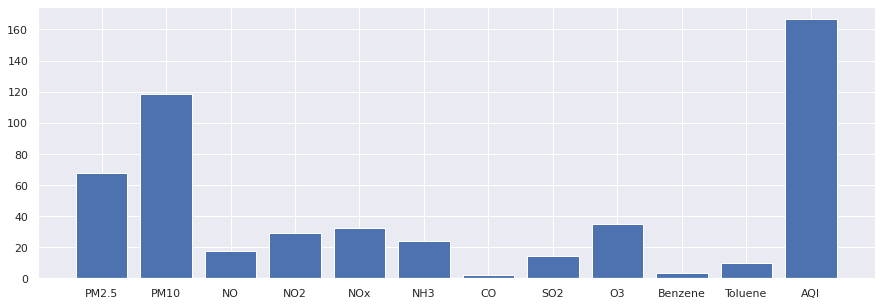

In [ ]:
l=[i for i in list(df.columns)[2:] if df[i].dtype!='object']
fig = plt.figure(figsize = (15, 5))
plt.bar(l,[np.mean(df[i]) for i in l])
plt.show()
# [np.mean(df[i])  for i in list(df.columns)[2:] if df[i].dtype!='object'].plot(kind='bar')

In [ ]:
print('List of cities',df['City'].unique())

List of cities ['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Delhi' 'Ernakulam'
 'Gurugram' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jorapokhar' 'Kochi' 'Kolkata'
 'Lucknow' 'Mumbai' 'Patna' 'Shillong' 'Talcher' 'Thiruvananthapuram'
 'Visakhapatnam']


In [ ]:
print(df.isna().sum())
x=list(df.columns)[2:]
print(df.shape)
df = df.dropna( how='all',
                    subset=x)
print(list(df.columns)[2:])
print(df.shape)

City             0
Date             0
PM2.5          678
PM10          7086
NO             387
NO2            391
NOx           1857
NH3           6536
CO             445
SO2            605
O3             807
Benzene       3535
Toluene       5826
AQI              0
AQI_Bucket       0
dtype: int64
(24850, 15)
['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket']
(24850, 15)


Analyze the air quality of Delhi from the dataset

Text(0.5, 1.0, 'Delhi PM10')

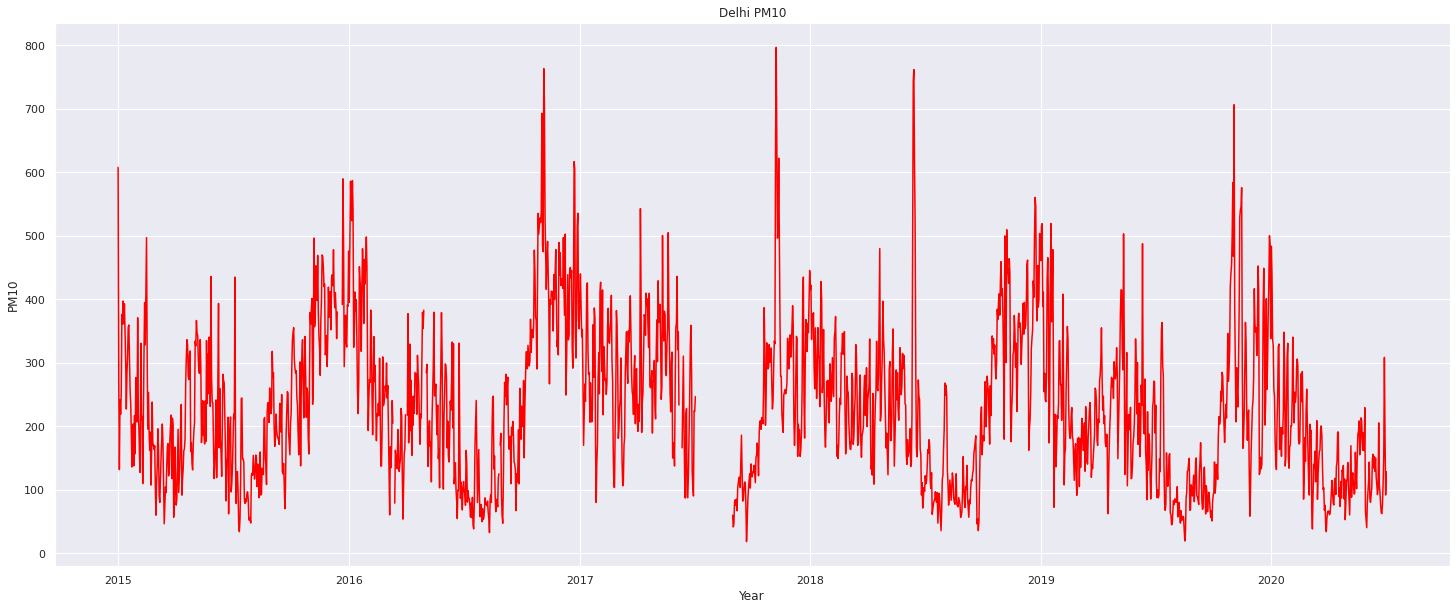

In [ ]:
Delhi=df.loc[df['City']=='Delhi']
plt.figure(figsize=(25,10))
plt.plot(Delhi['Date'],Delhi['PM10'],color='red')
plt.xlabel('Year')
plt.ylabel('PM10')
plt.title('Delhi PM10')
# Delhi.loc[Delhi['AQI']==Delhi['AQI'].max()]

Notice the peak at 2017. Although similar to other years this year in particular was a dark time for Delhi quite literally. As Wikipedia suggests - "In November 2017, in an event known as the Great Smog of Delhi, the air pollution spiked far beyond acceptable levels. Levels of PM2. 5 and PM 10 particulate matter hit 999 micrograms per cubic meter, while the safe limits for those pollutants are 60 and 100 respectively."

In [ ]:
l=list(df.columns)[2:14]
d={i : dict(df.groupby(by=['City'])[i].mean()) for i in l}
for i in list(d.keys()):
    for j in list(d[i].keys()):
        if(pd.isnull(d[i][j])):
            d[i][j]=0
# print(d)
# for i in list(d.keys()):
#     print(list(d[i].keys()))
# print(d)
for i in range(0,len(df)):
    for j in l:
        if(pd.isnull(df.iloc[i][j])):
            df.iloc[i, df.columns.get_loc(j)]=(d[j][df.iloc[i]['City']])
# for i in range(0,len(df)):
#     if(pd.isnull(df.iloc[i]['NO'])):
#         # print(df.iloc[i]['City'])
#         print(df.iloc[i]['City'])
        # df.iloc[i, df.columns.get_loc('NO')]=d['NO']
# print(df.head(13))
# fig = plt.figure(figsize = (50, 15))
# plt.bar(d.keys(),d.values())
# plt.show()

Analyze all pollutants and air quality in the dataset

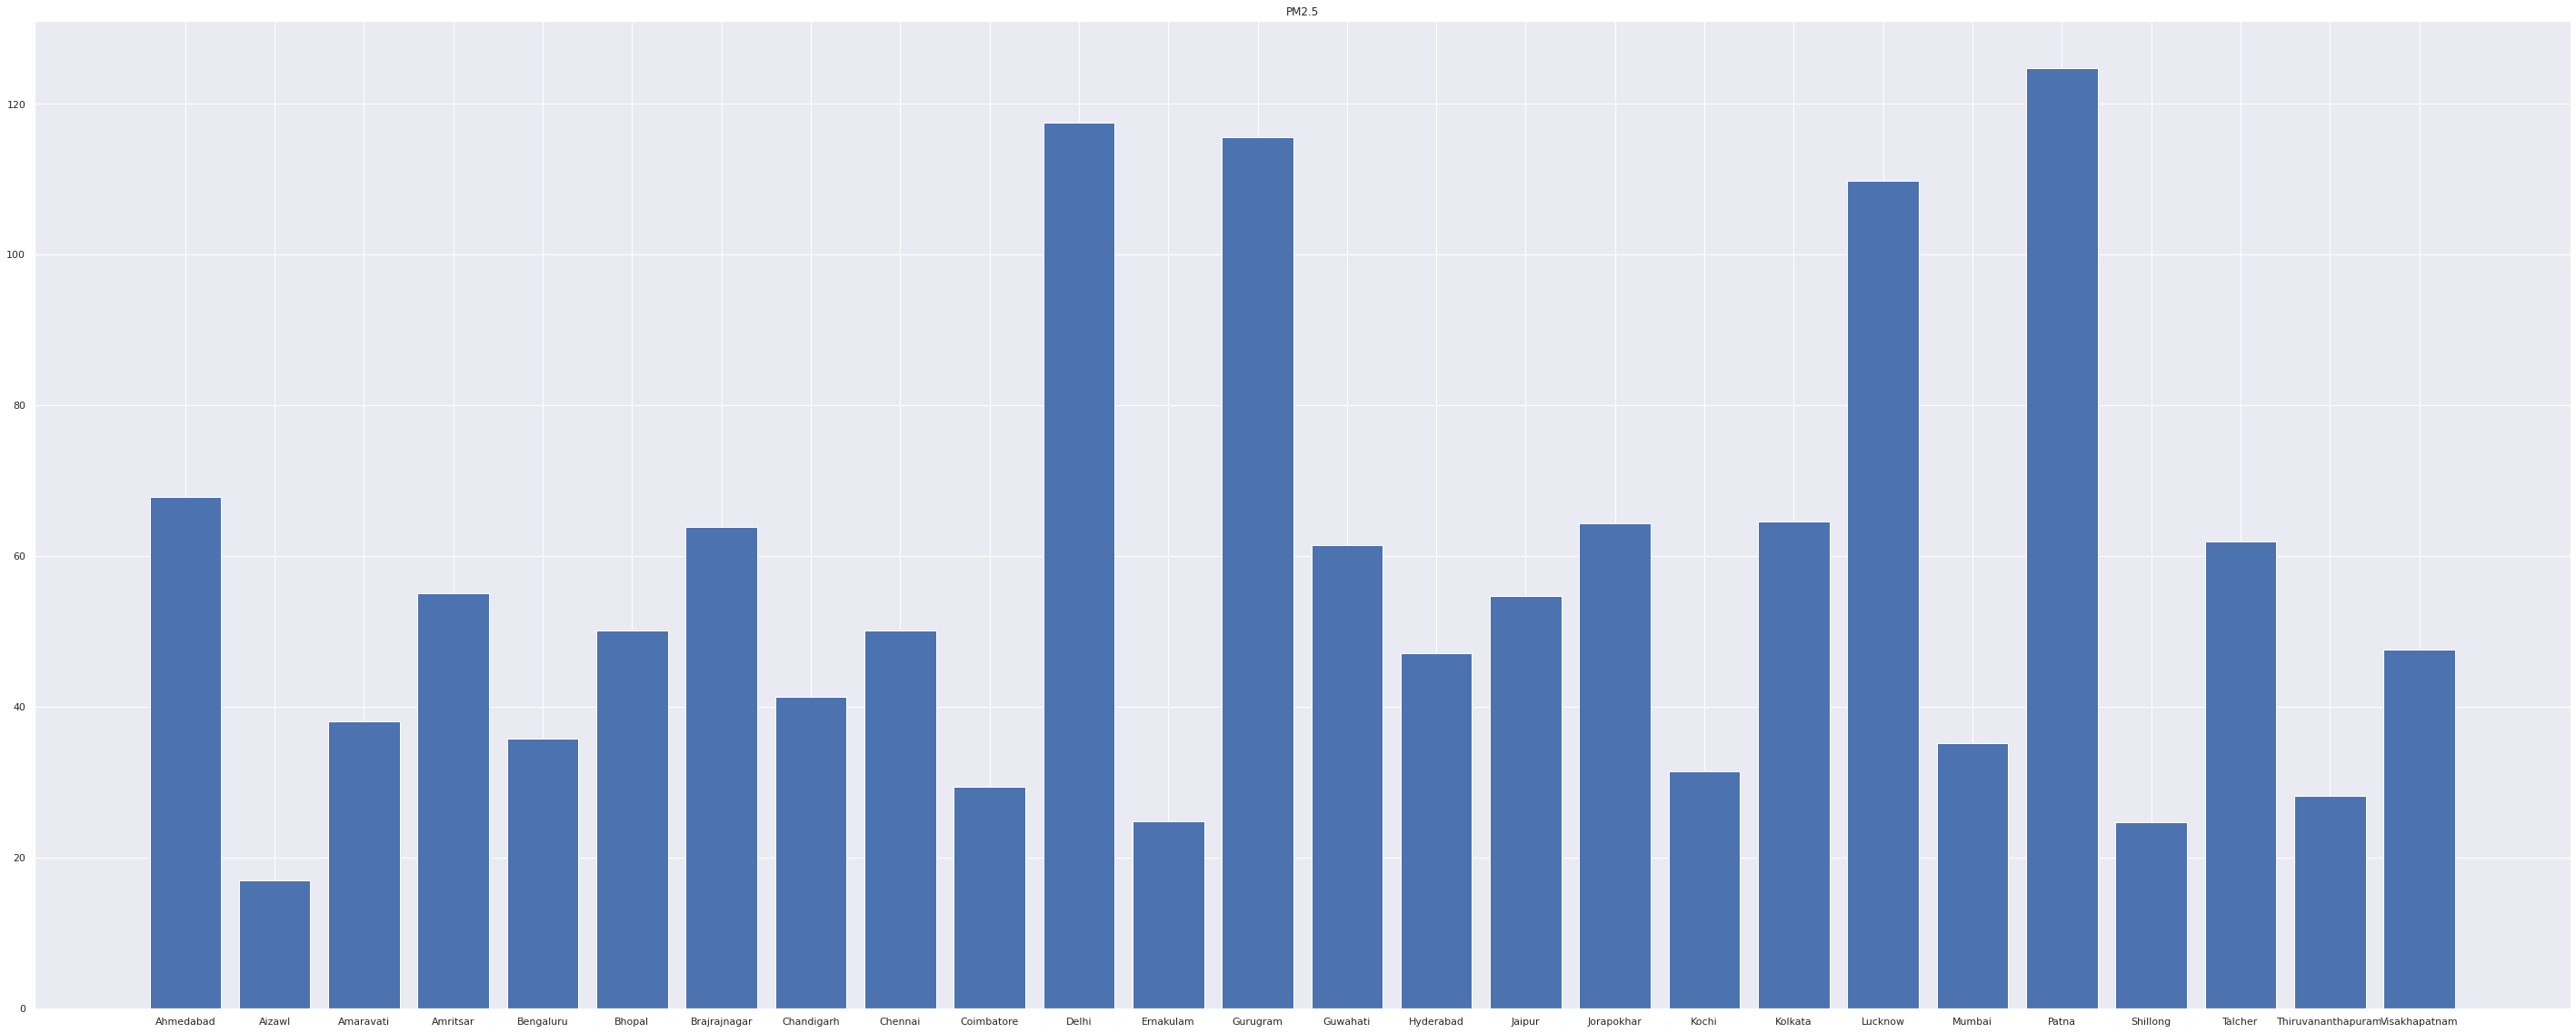

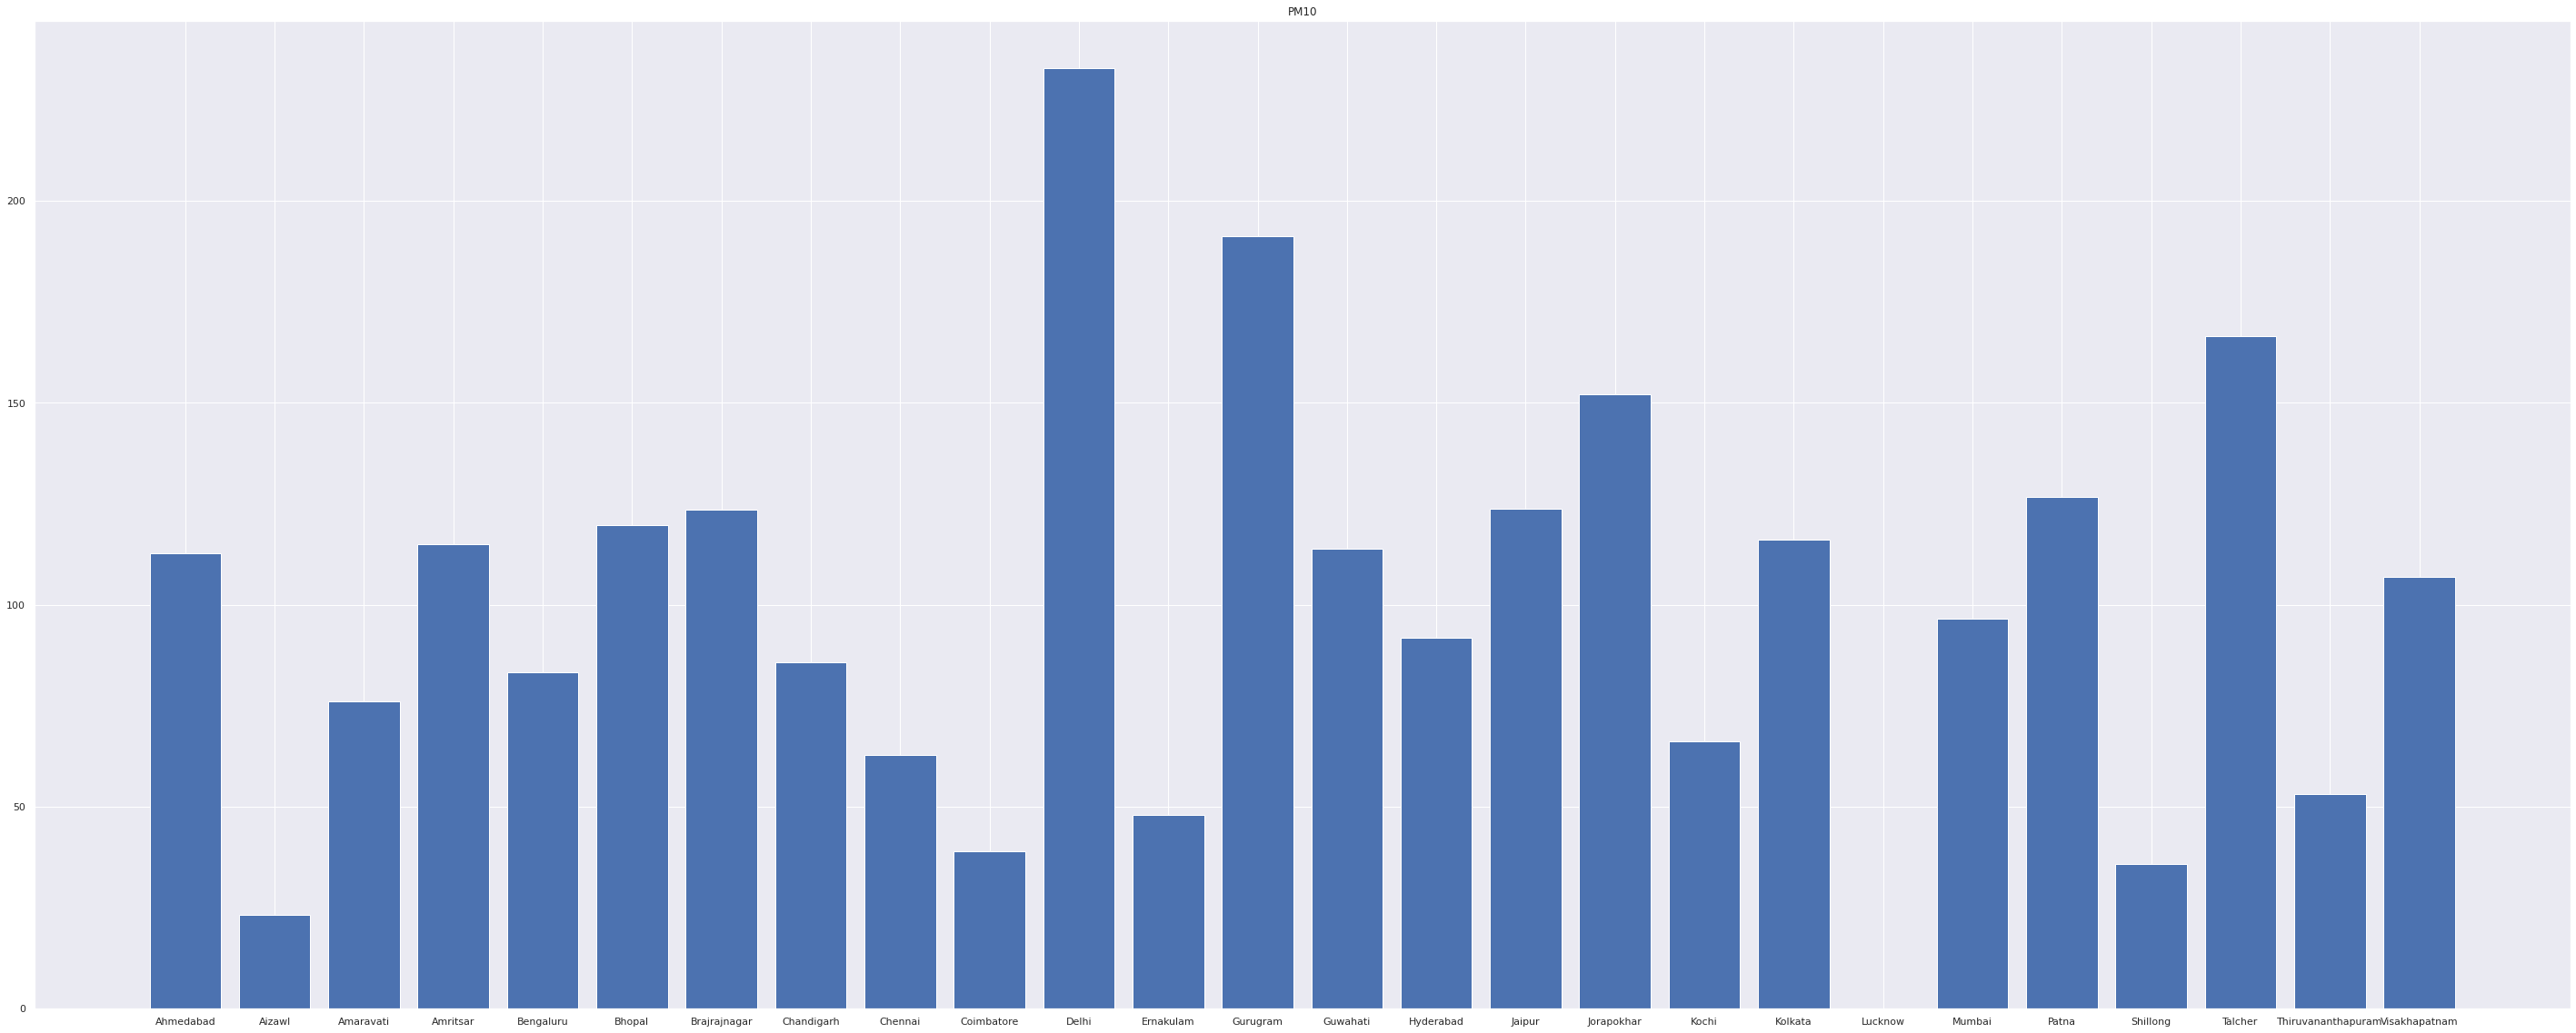

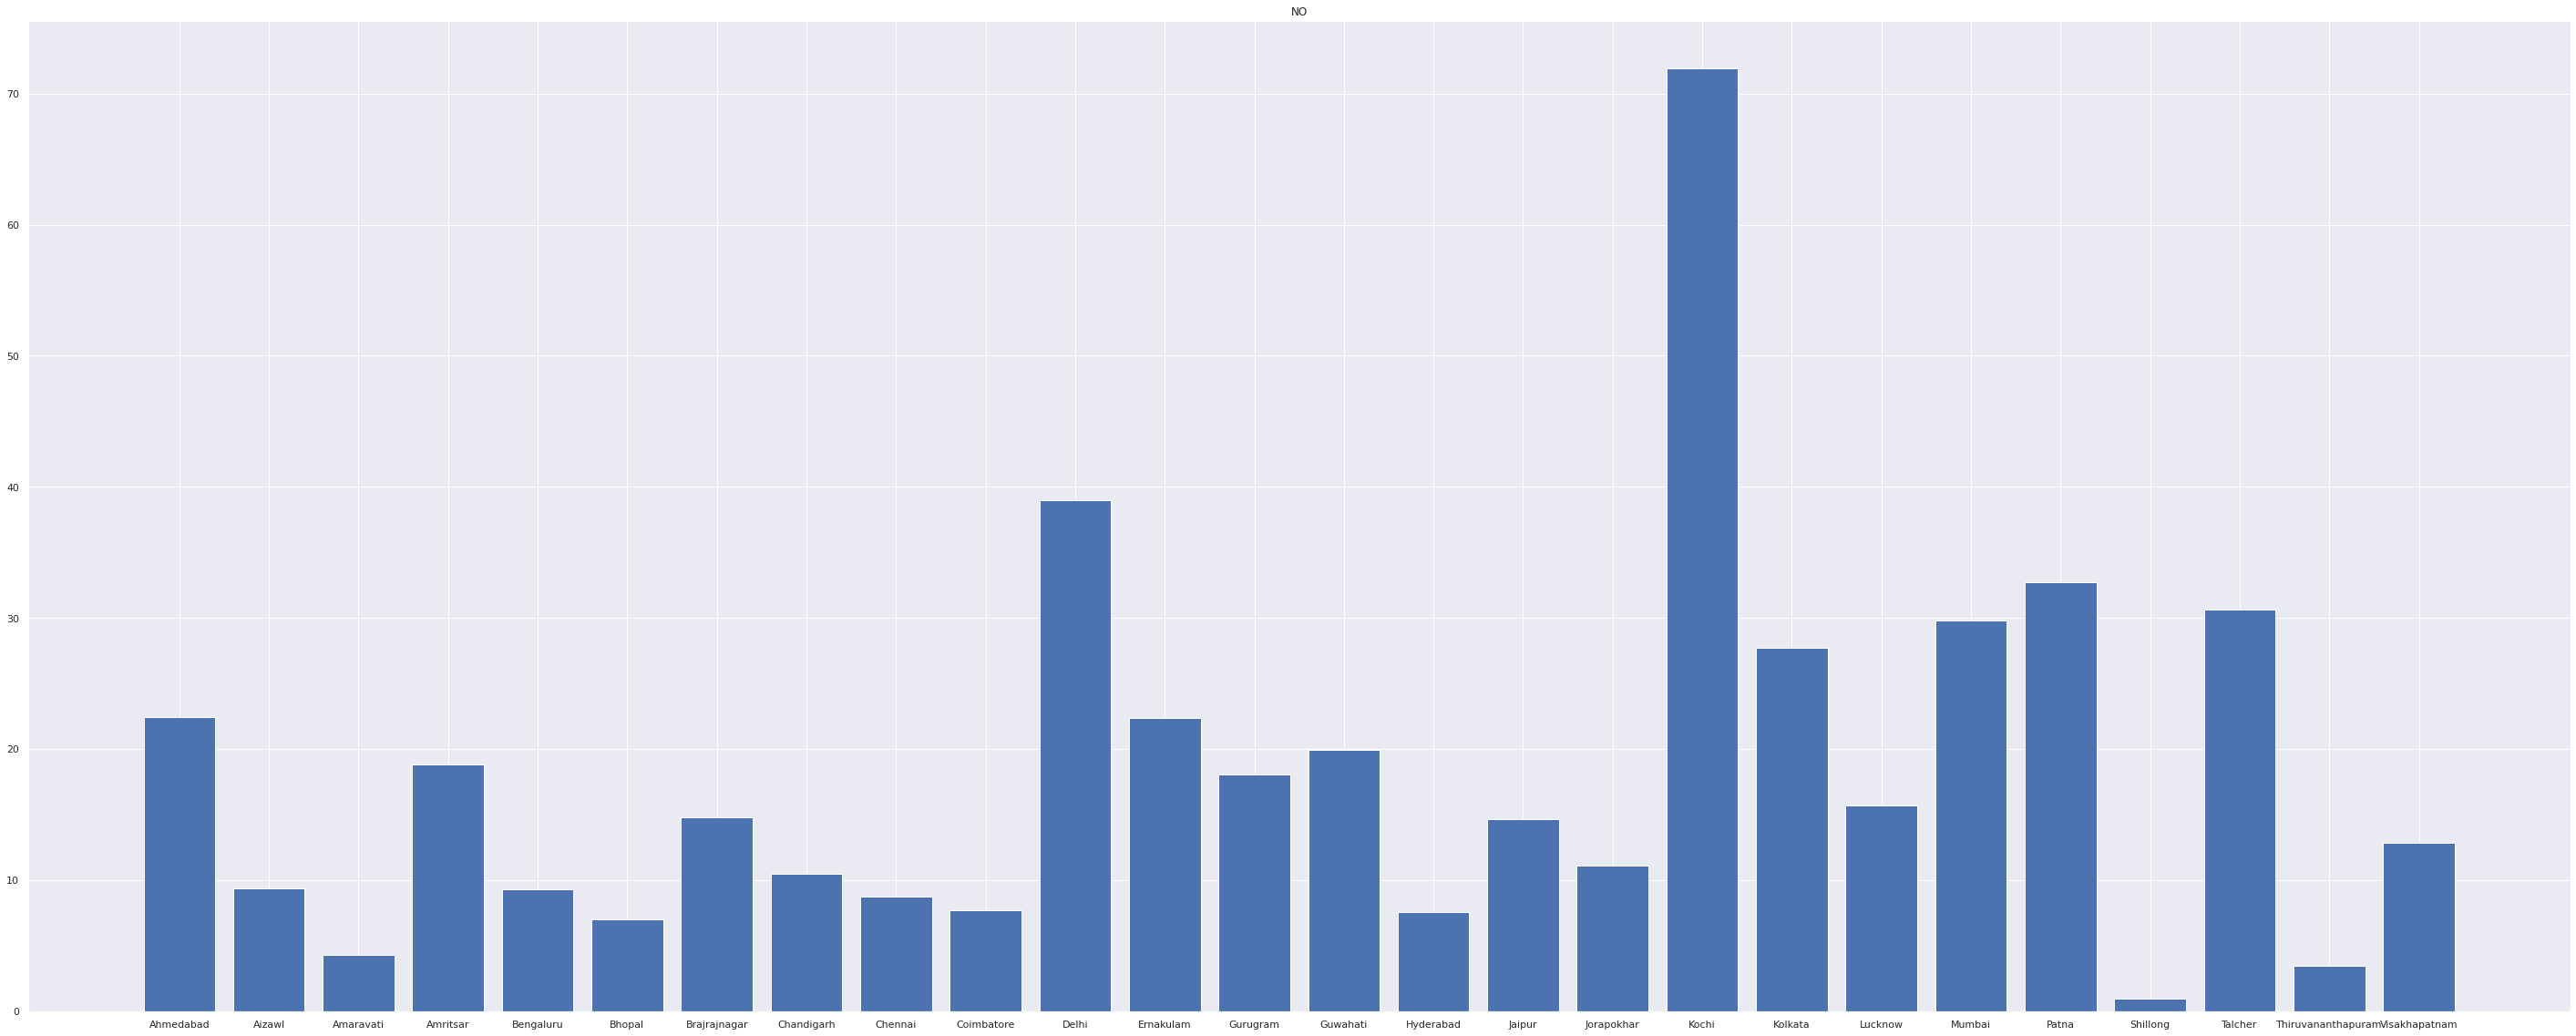

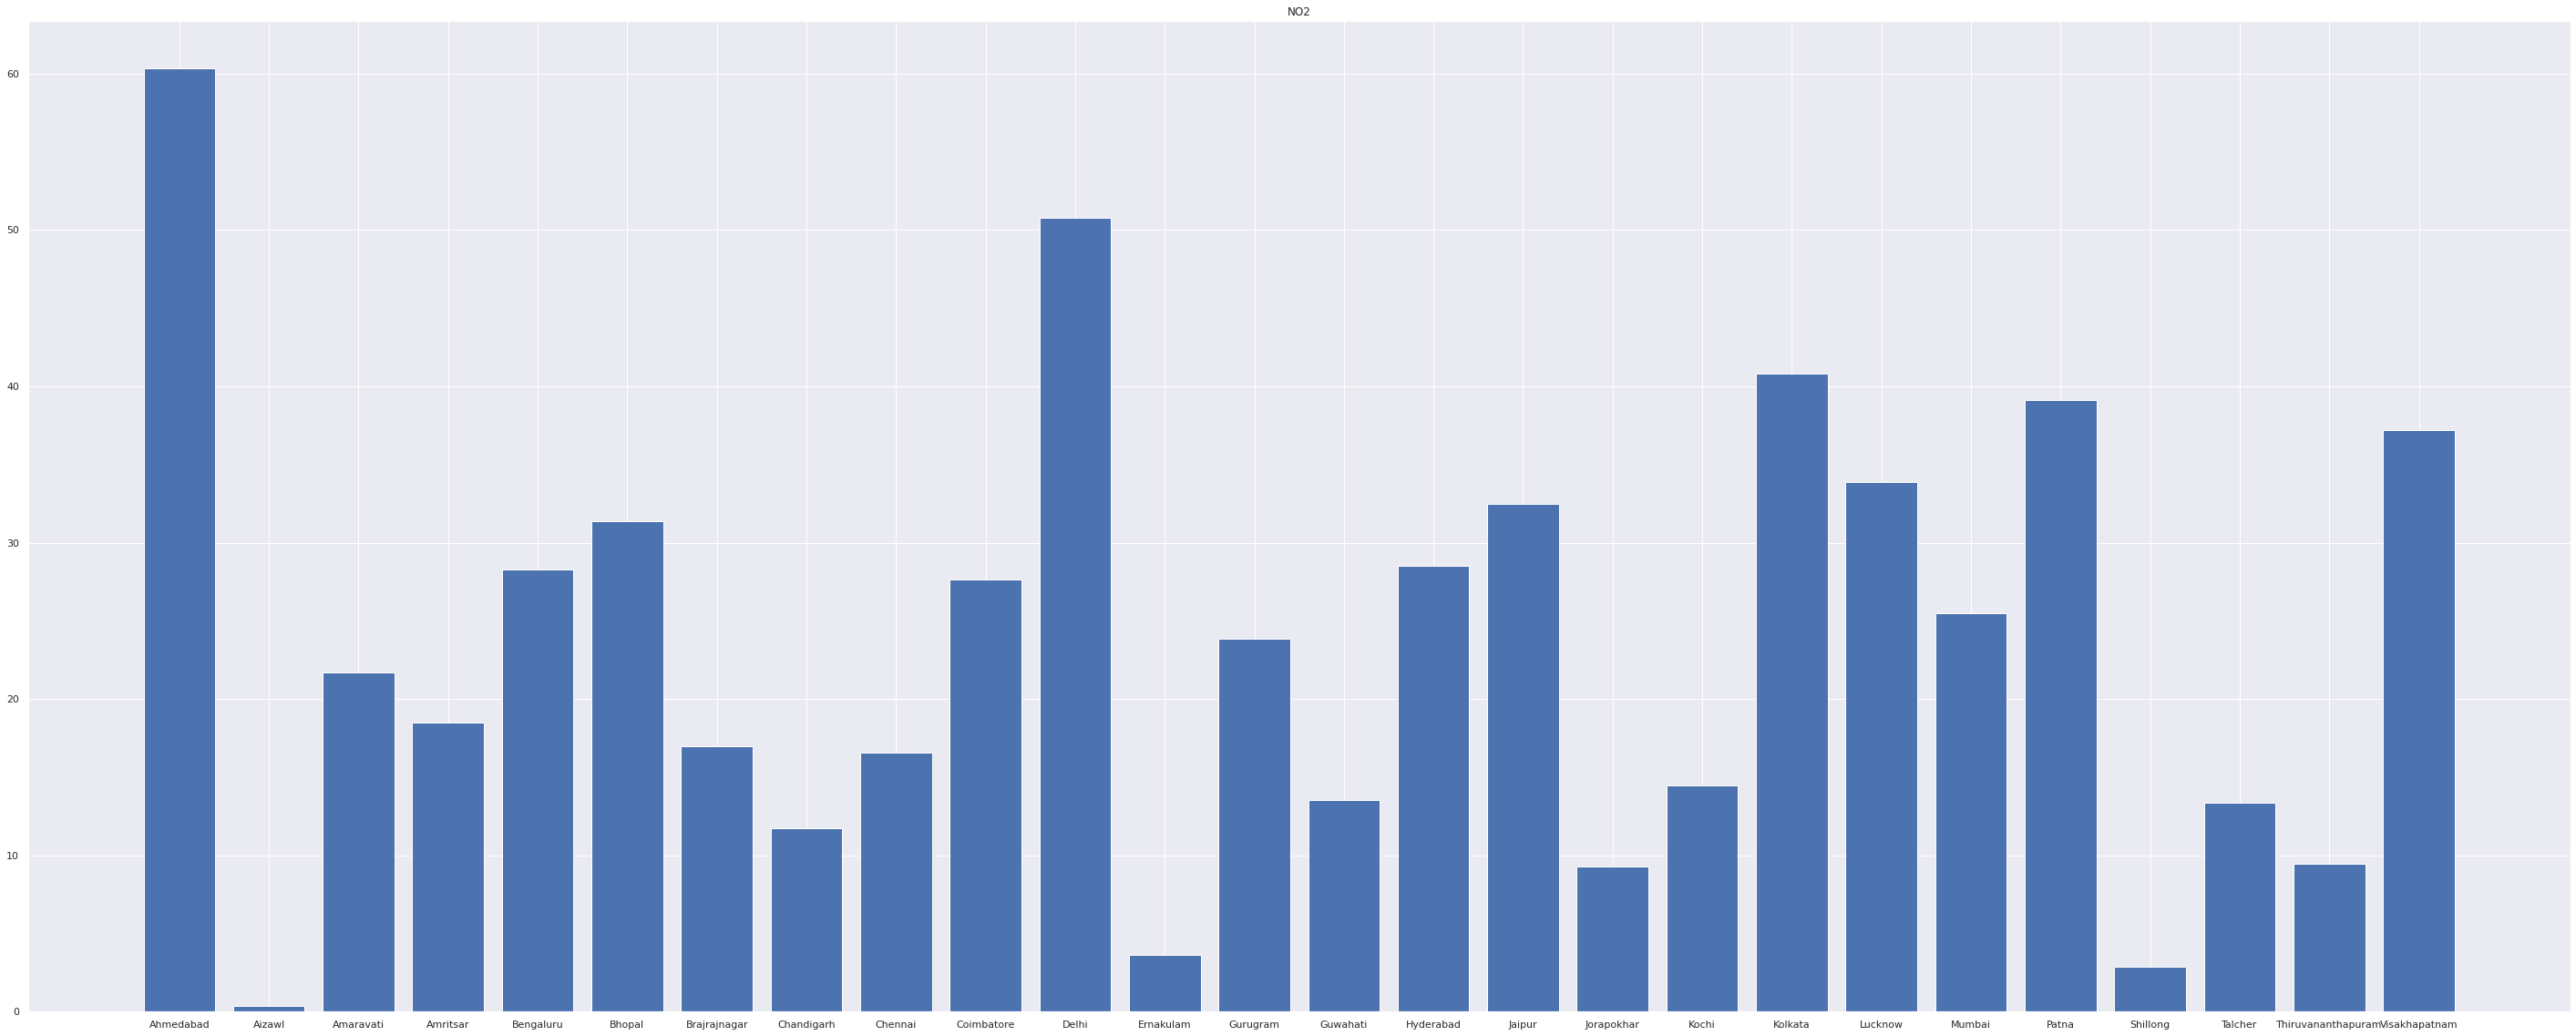

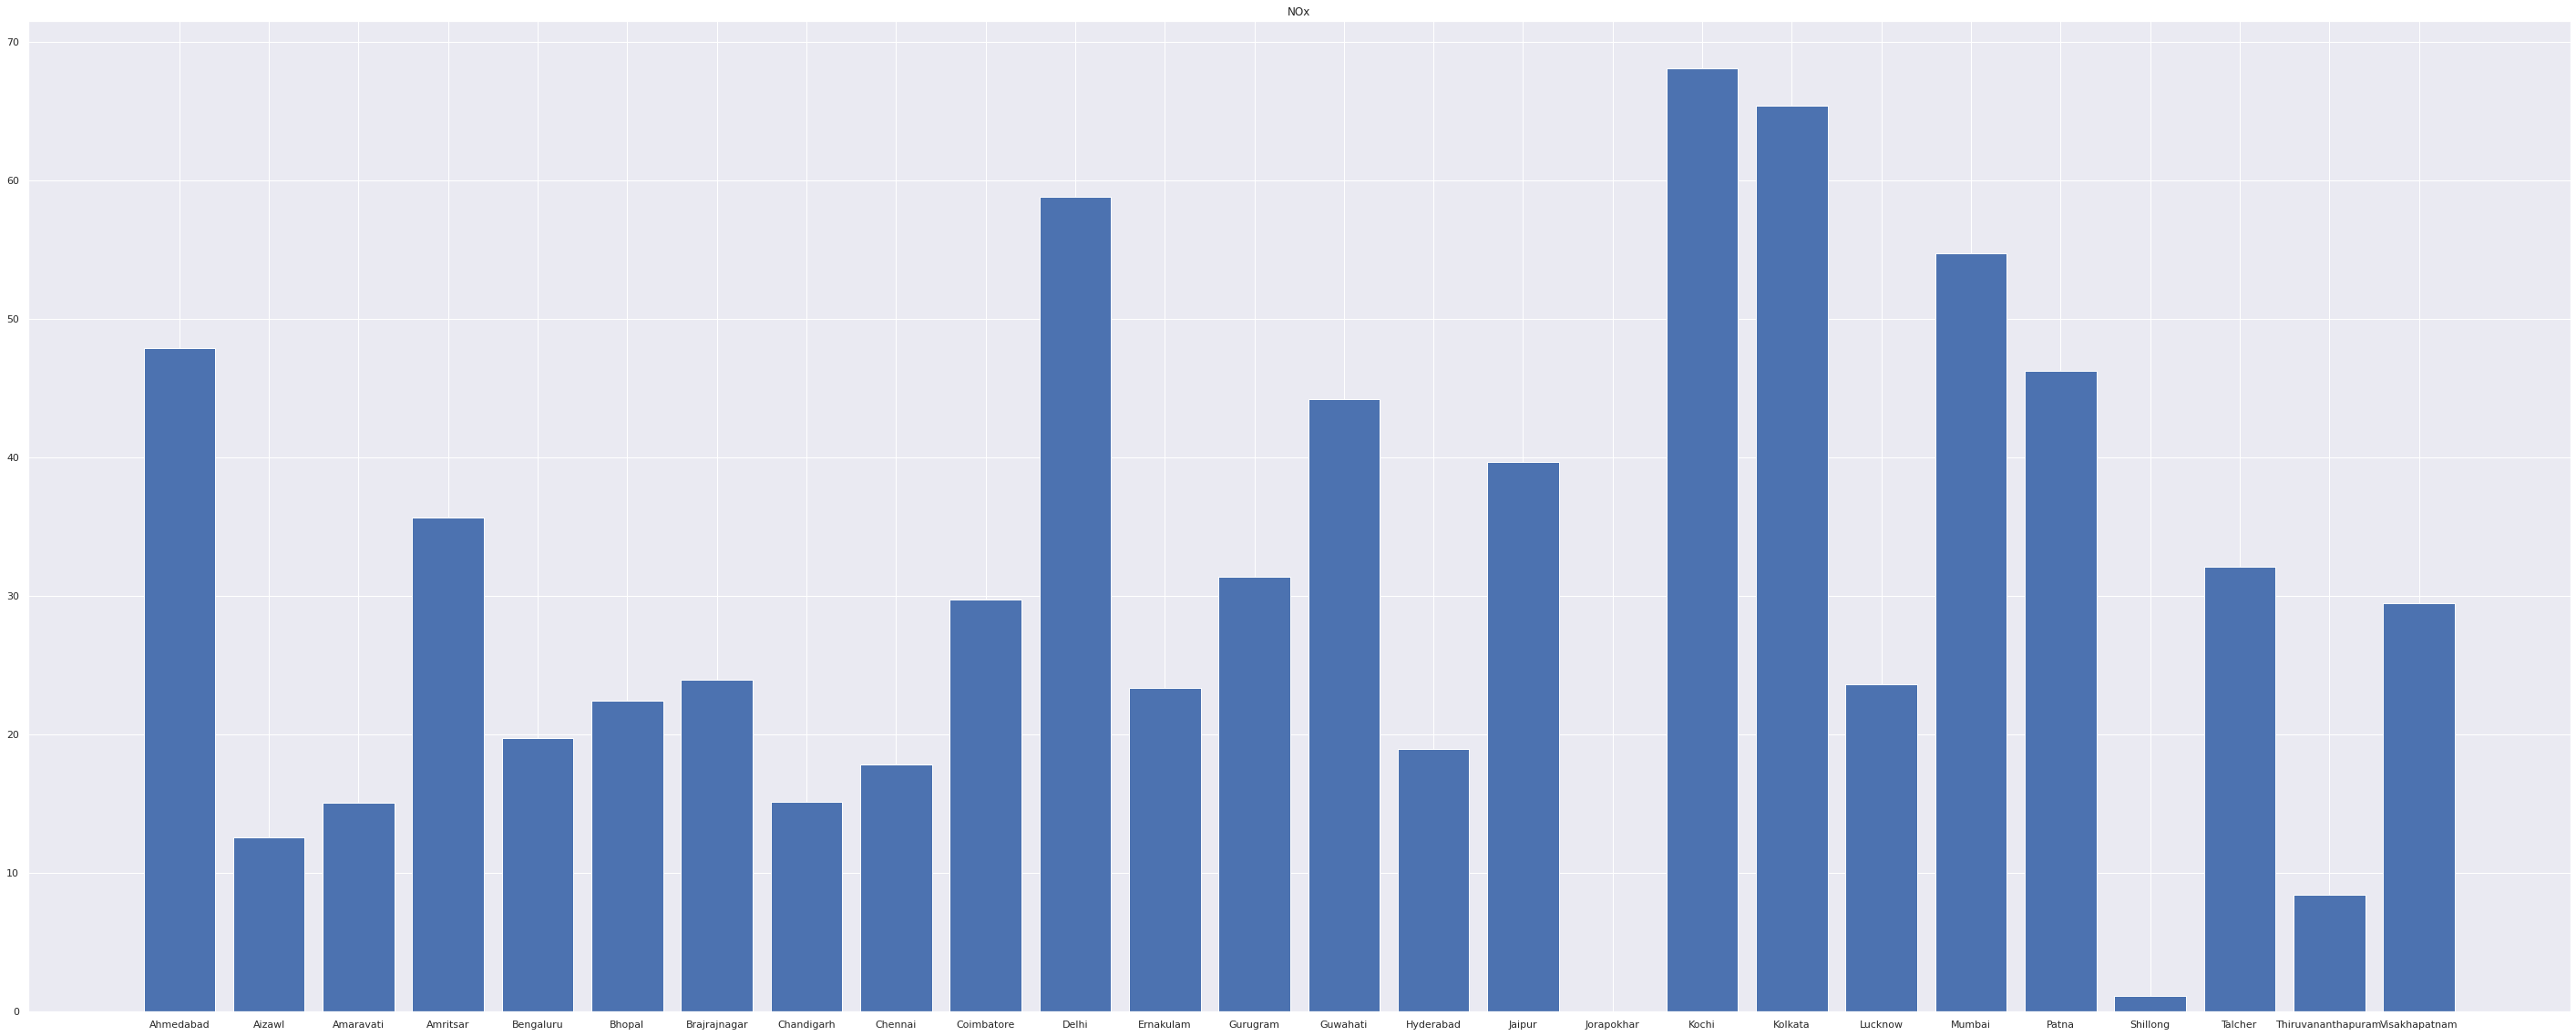

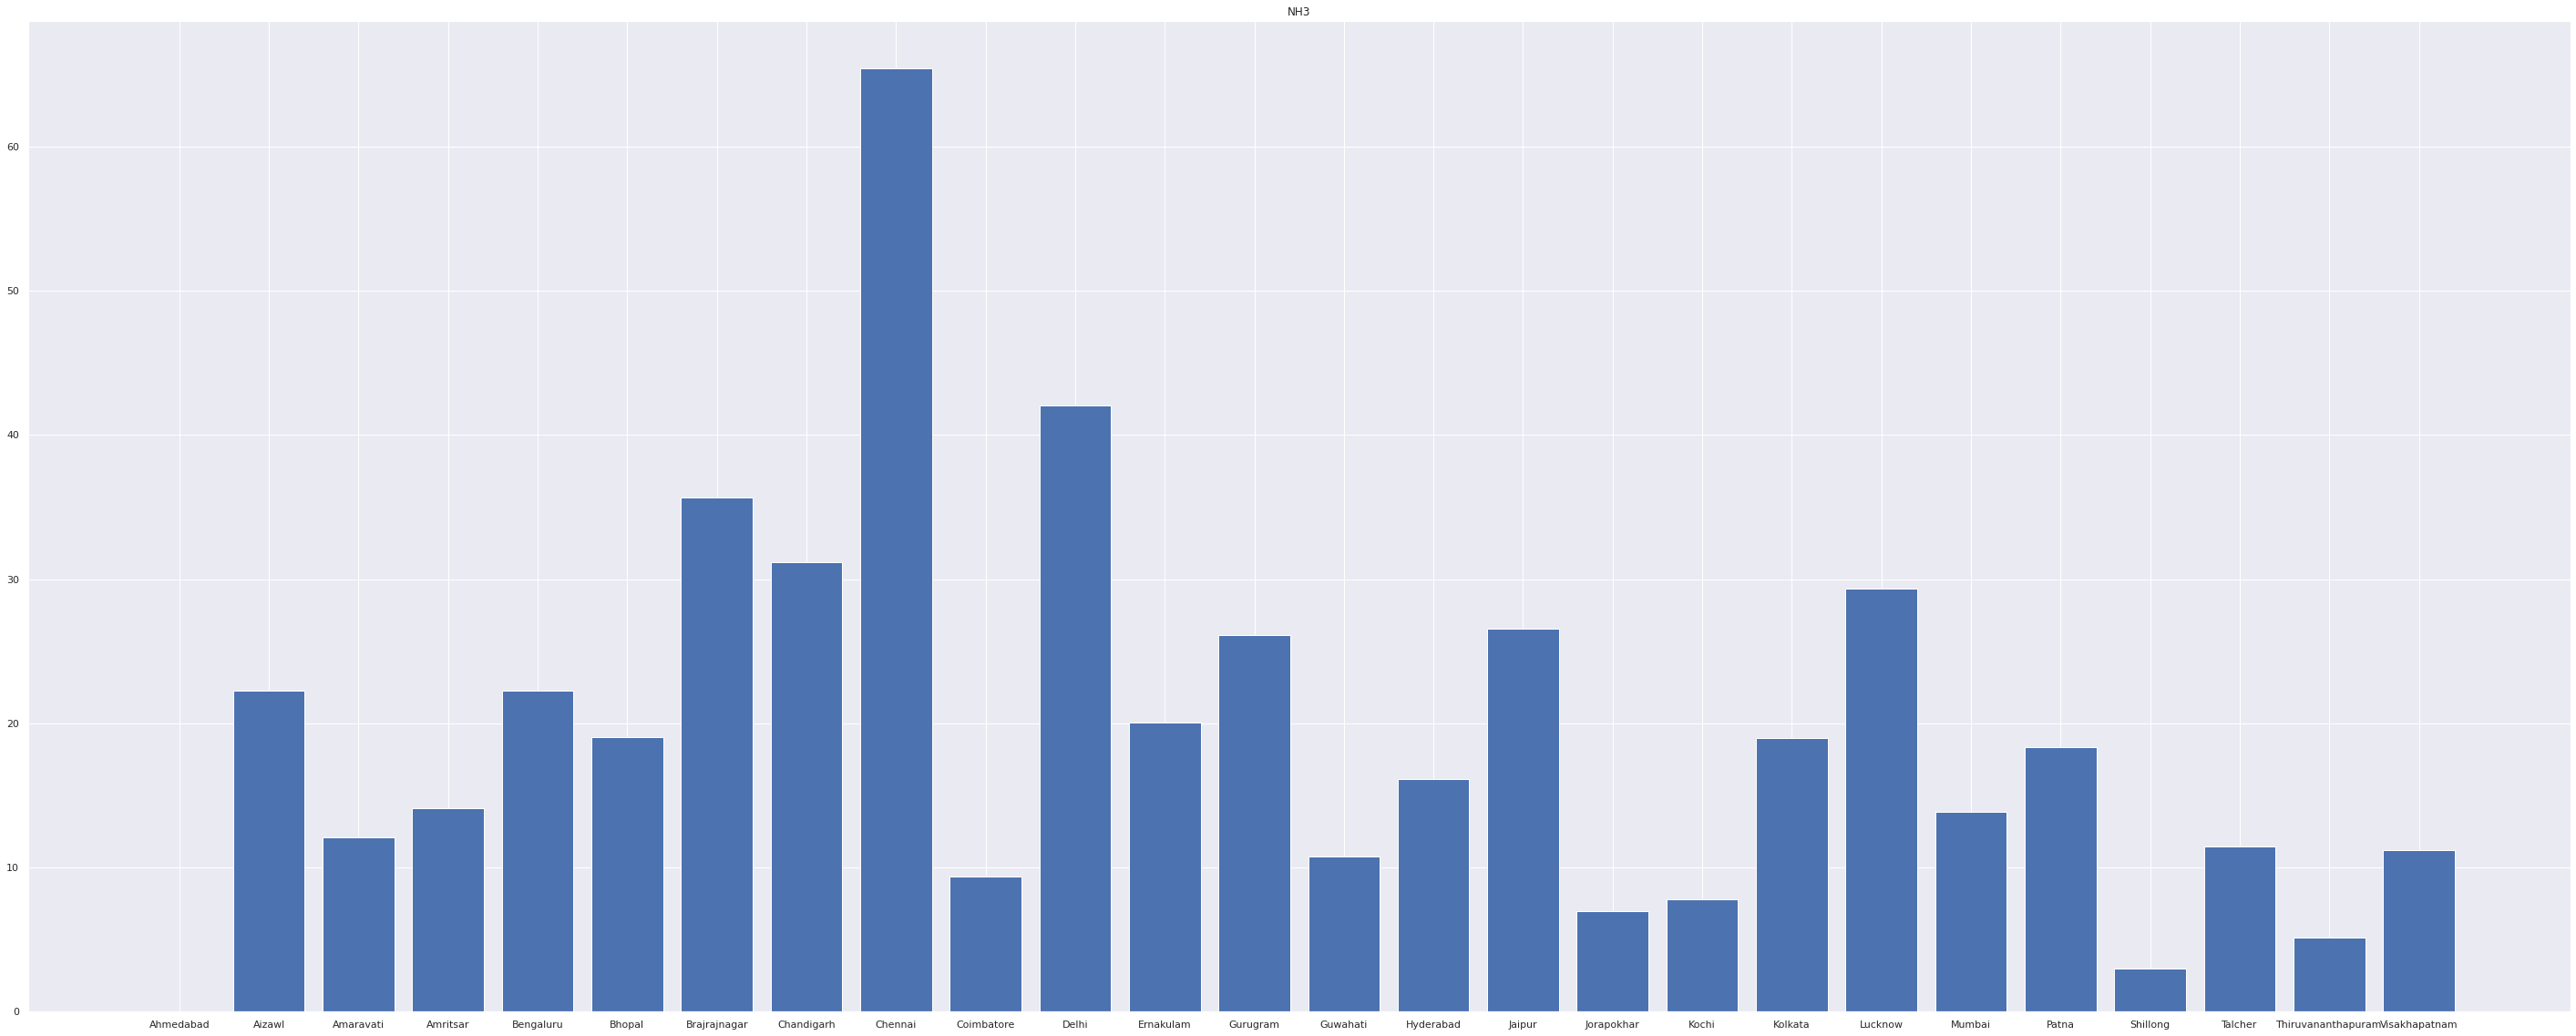

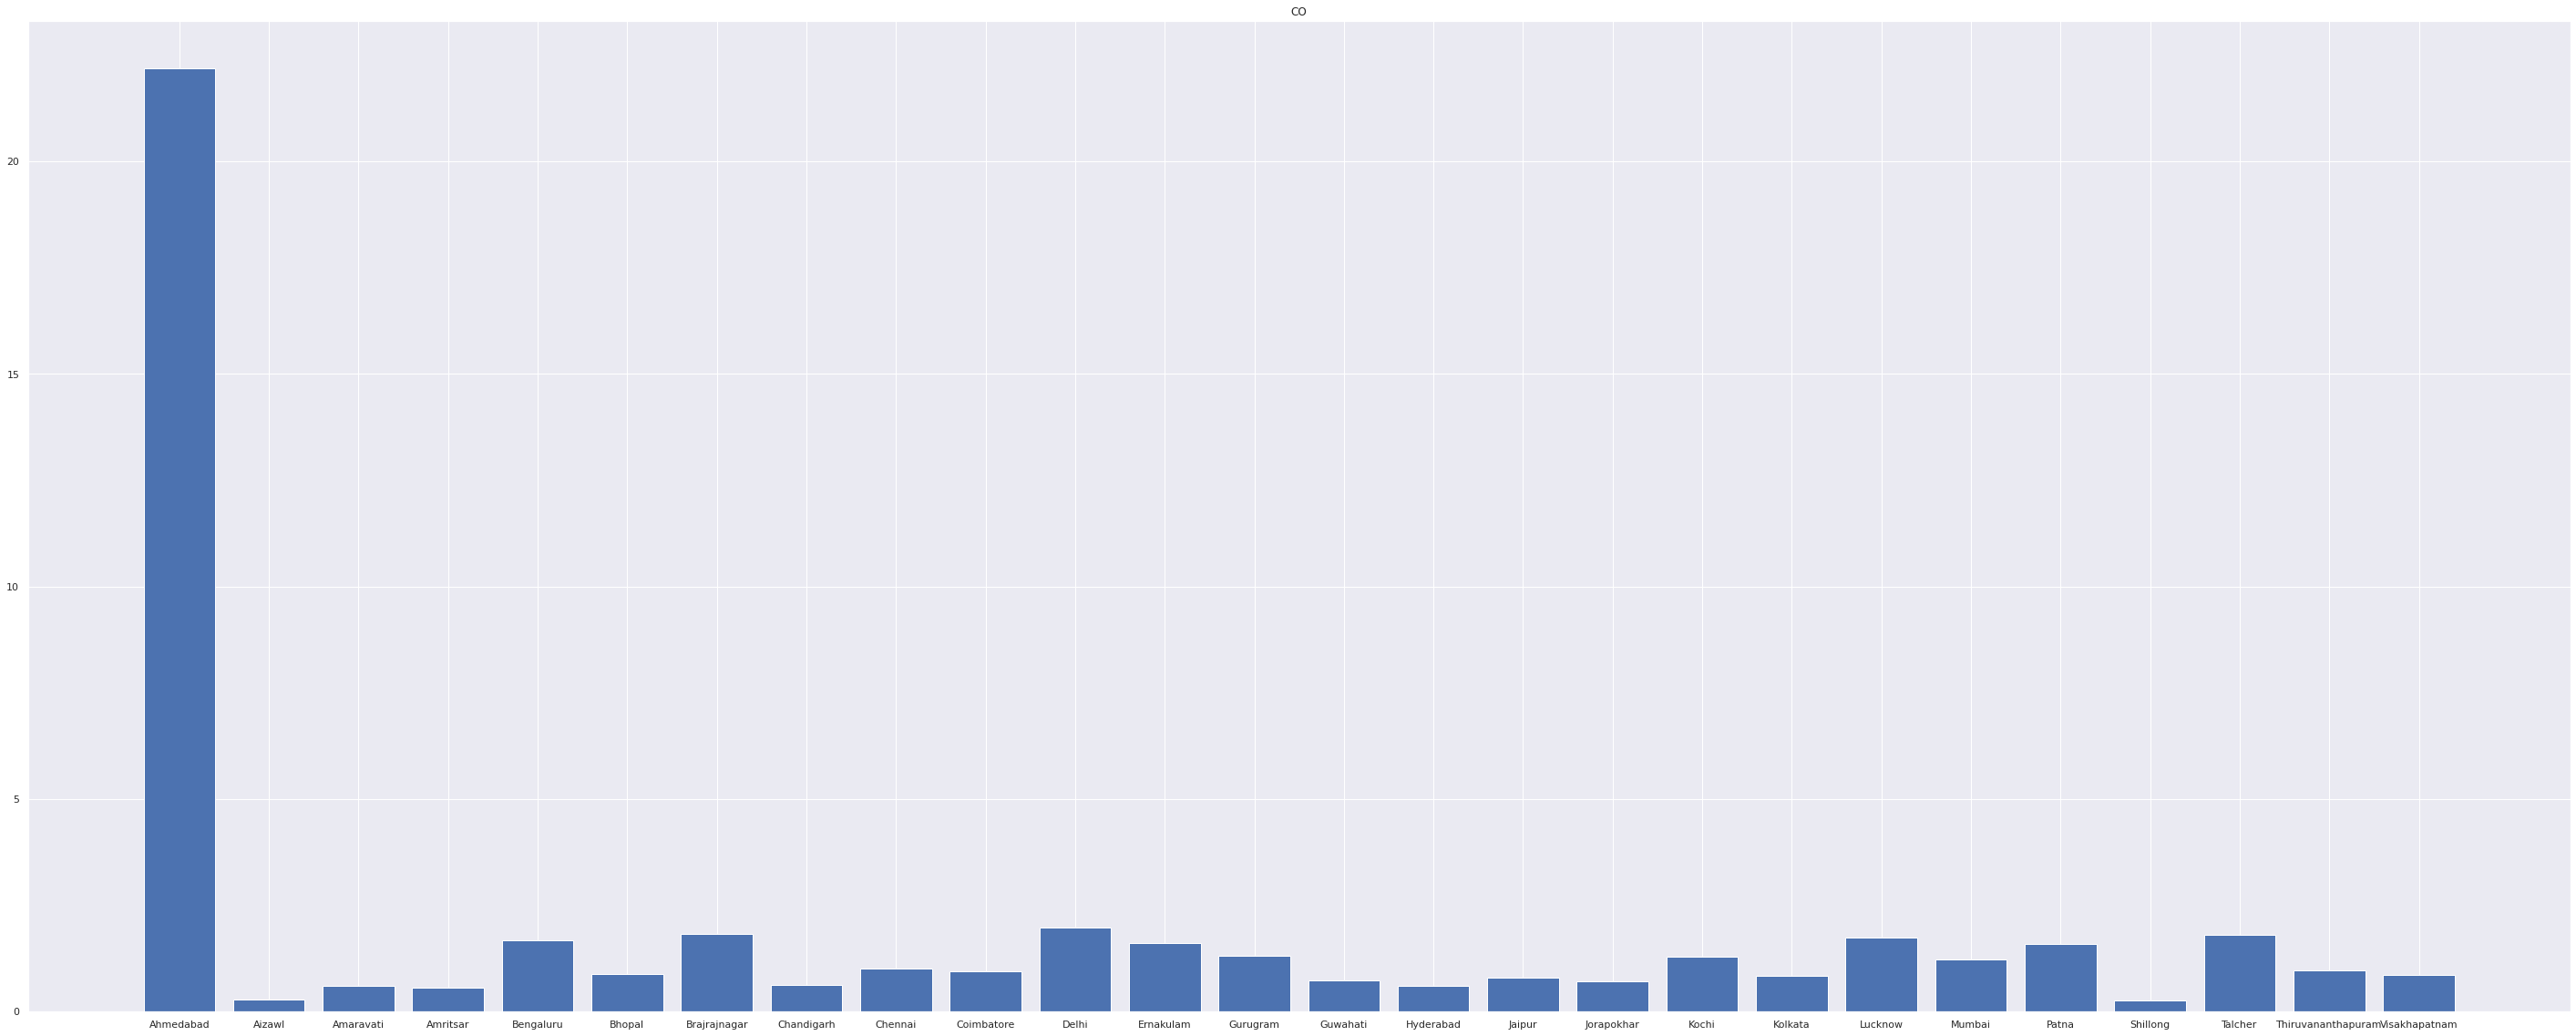

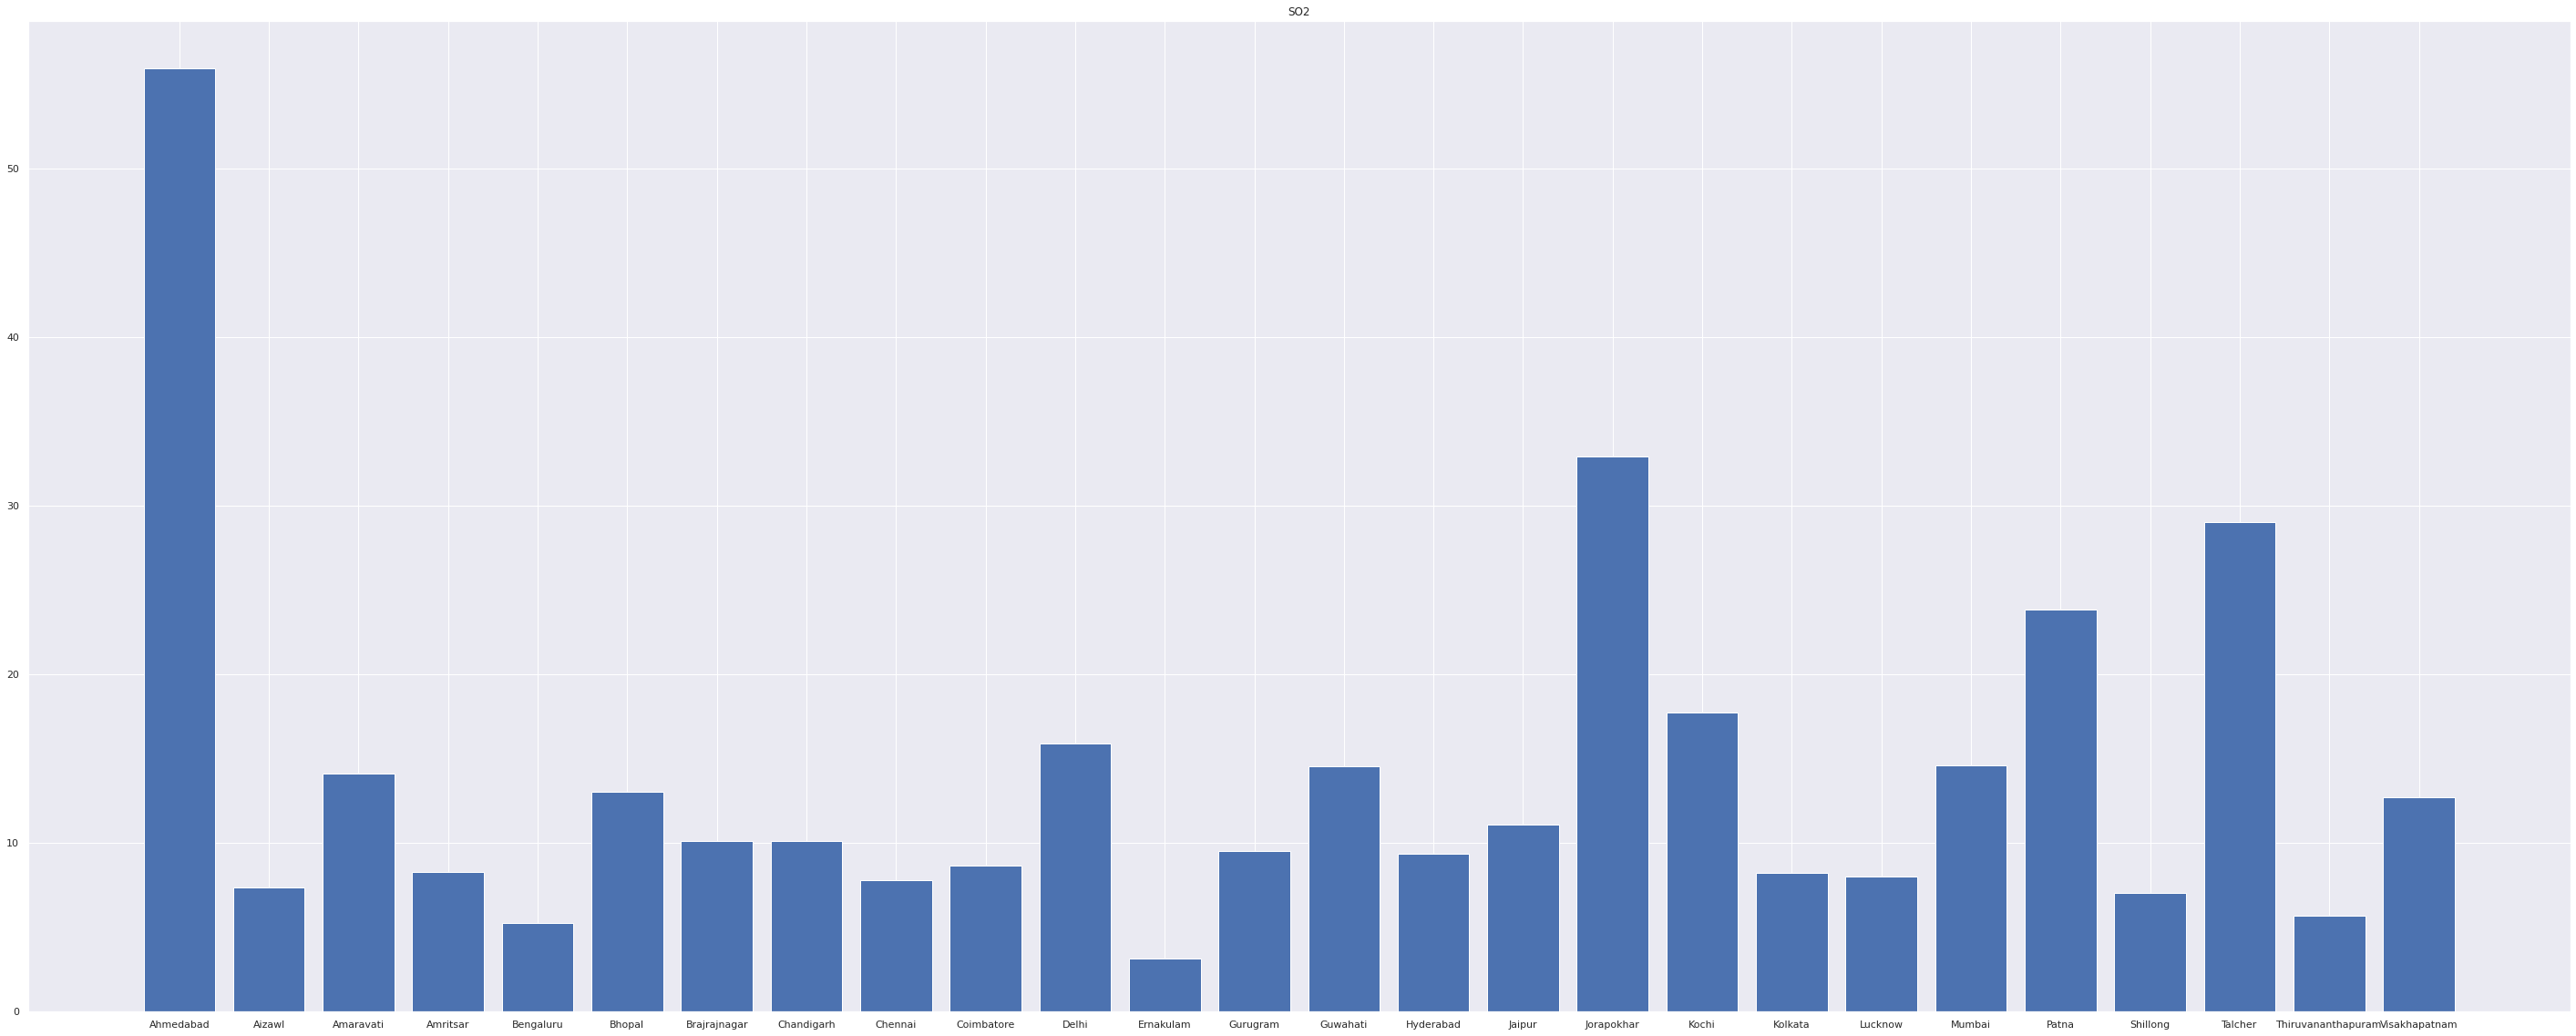

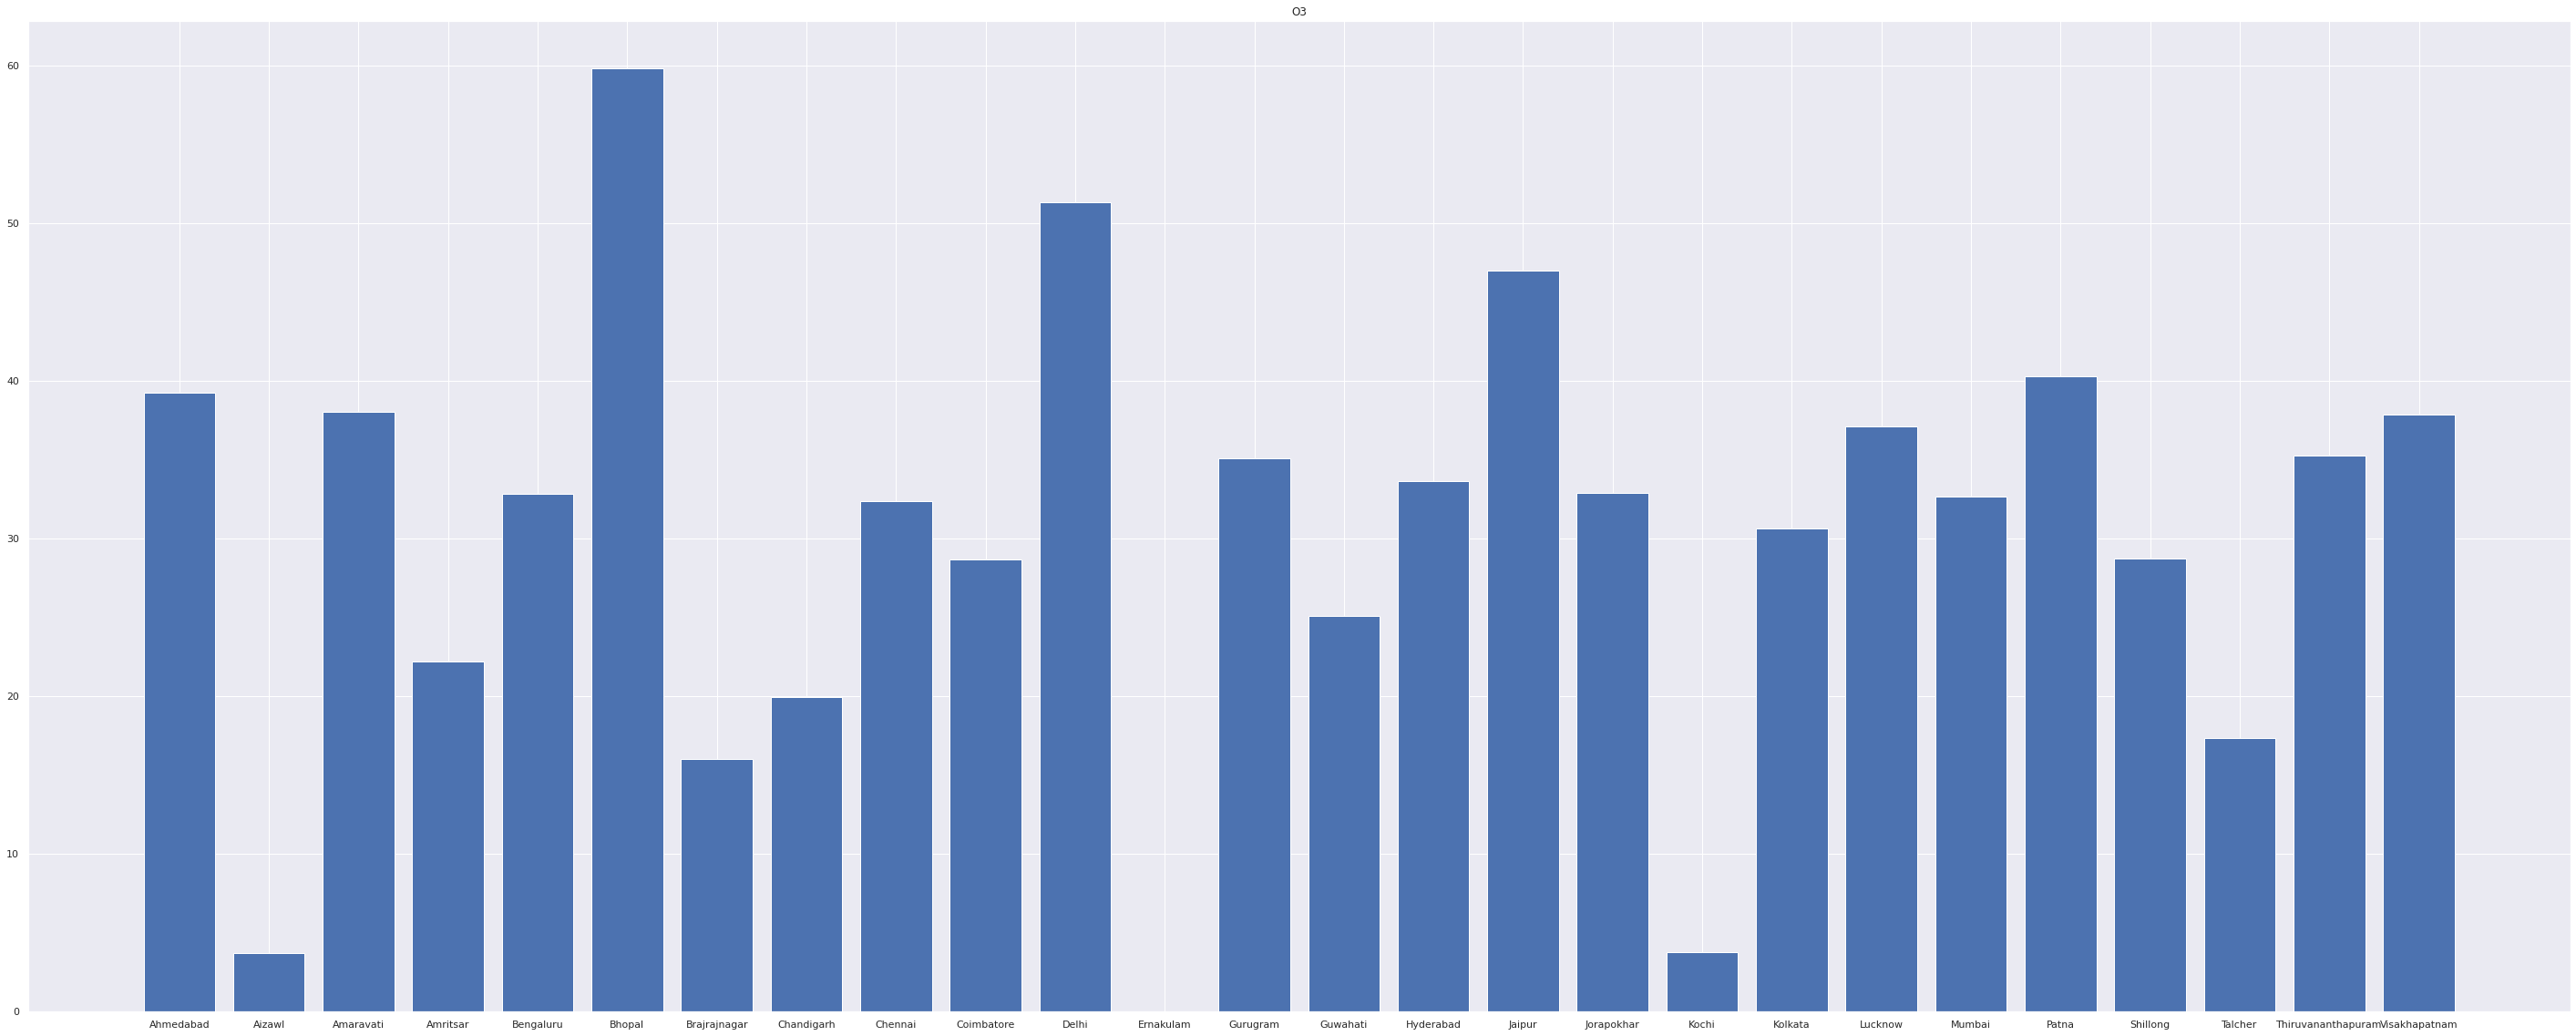

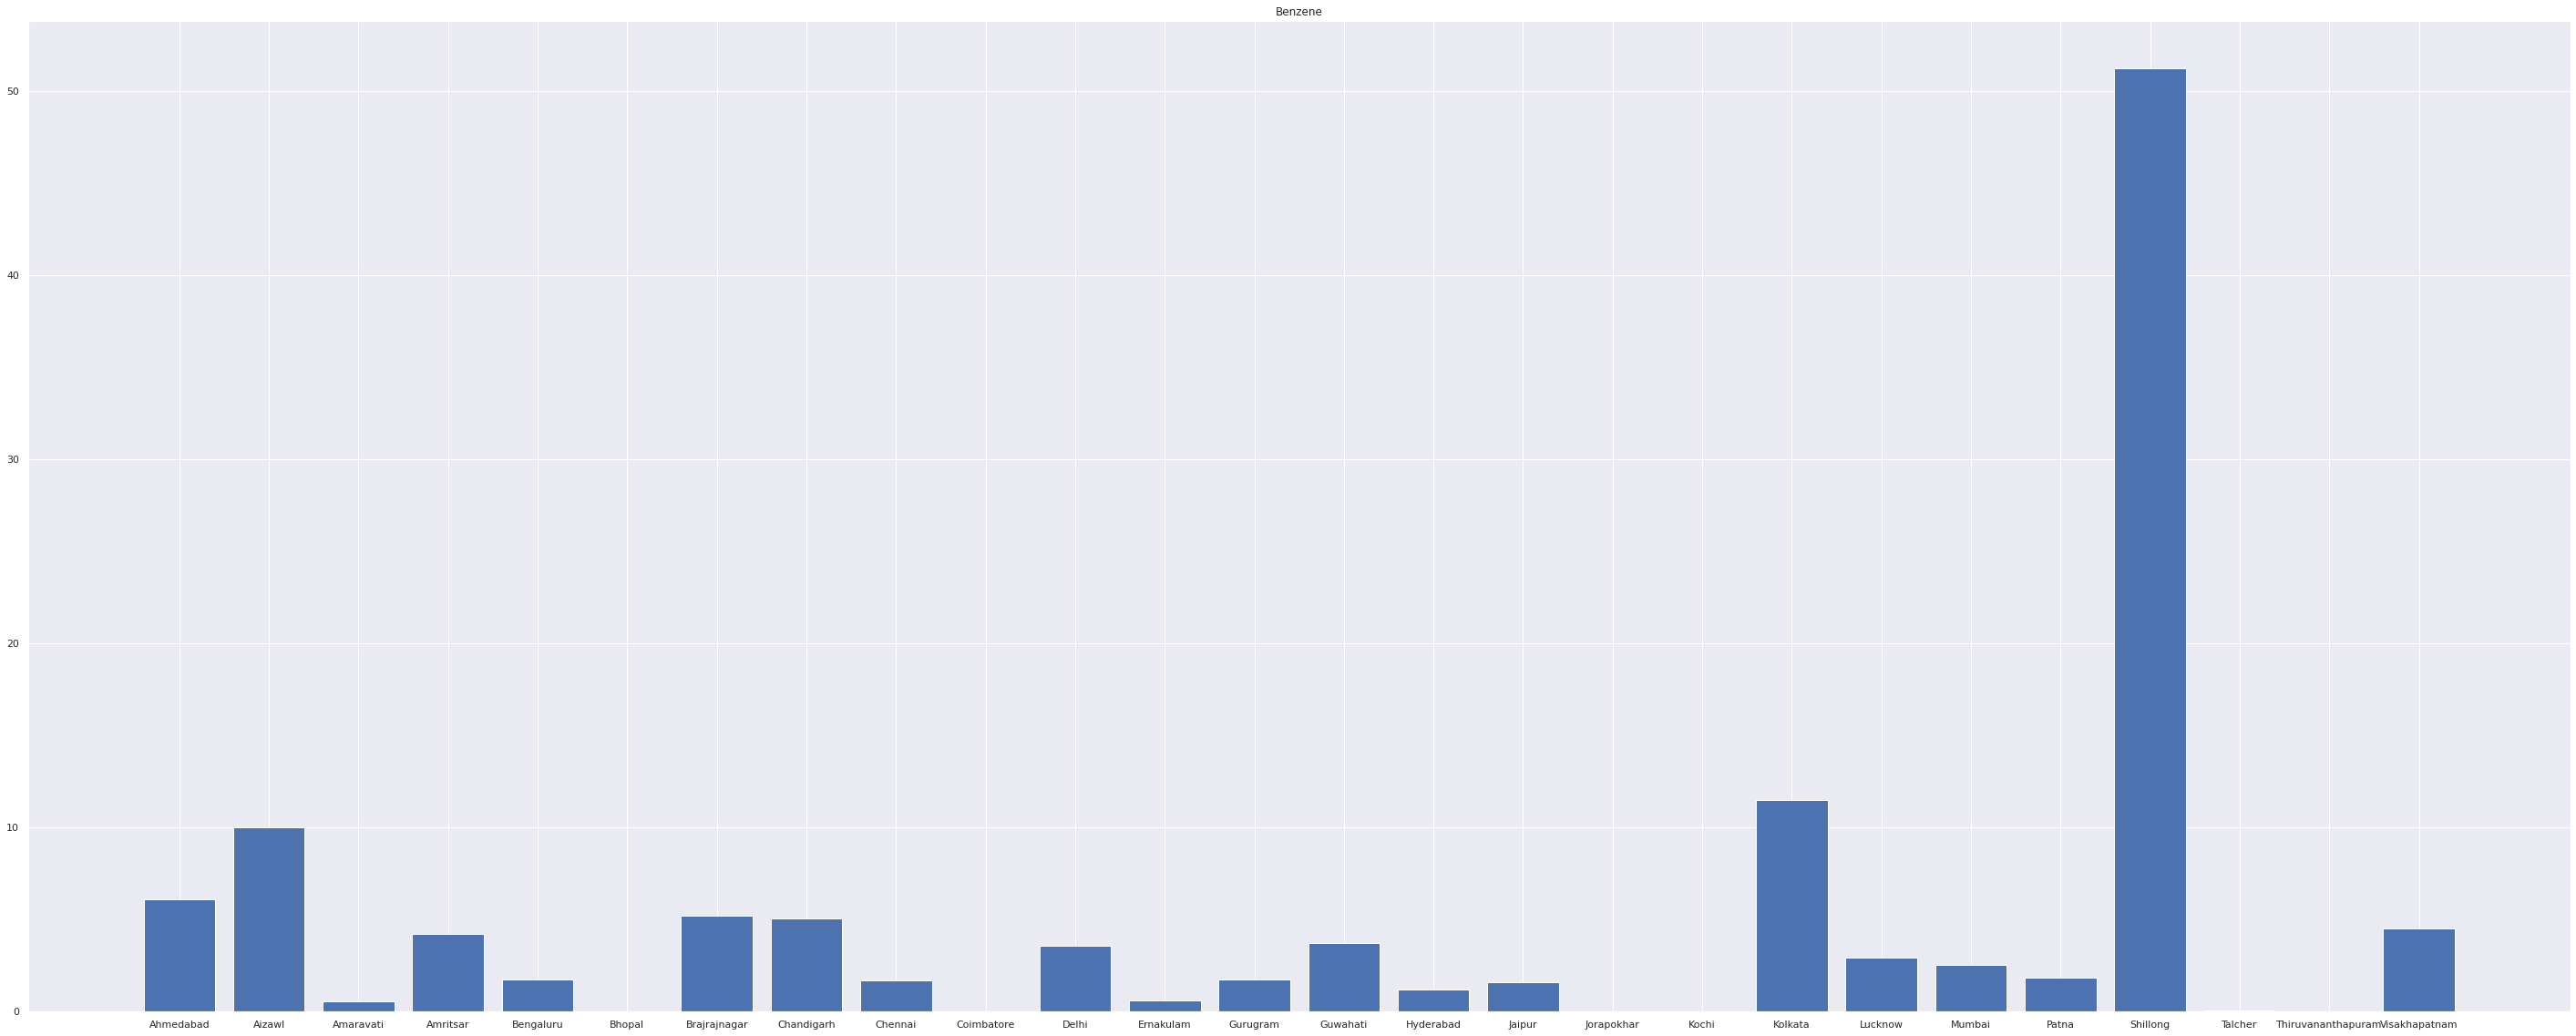

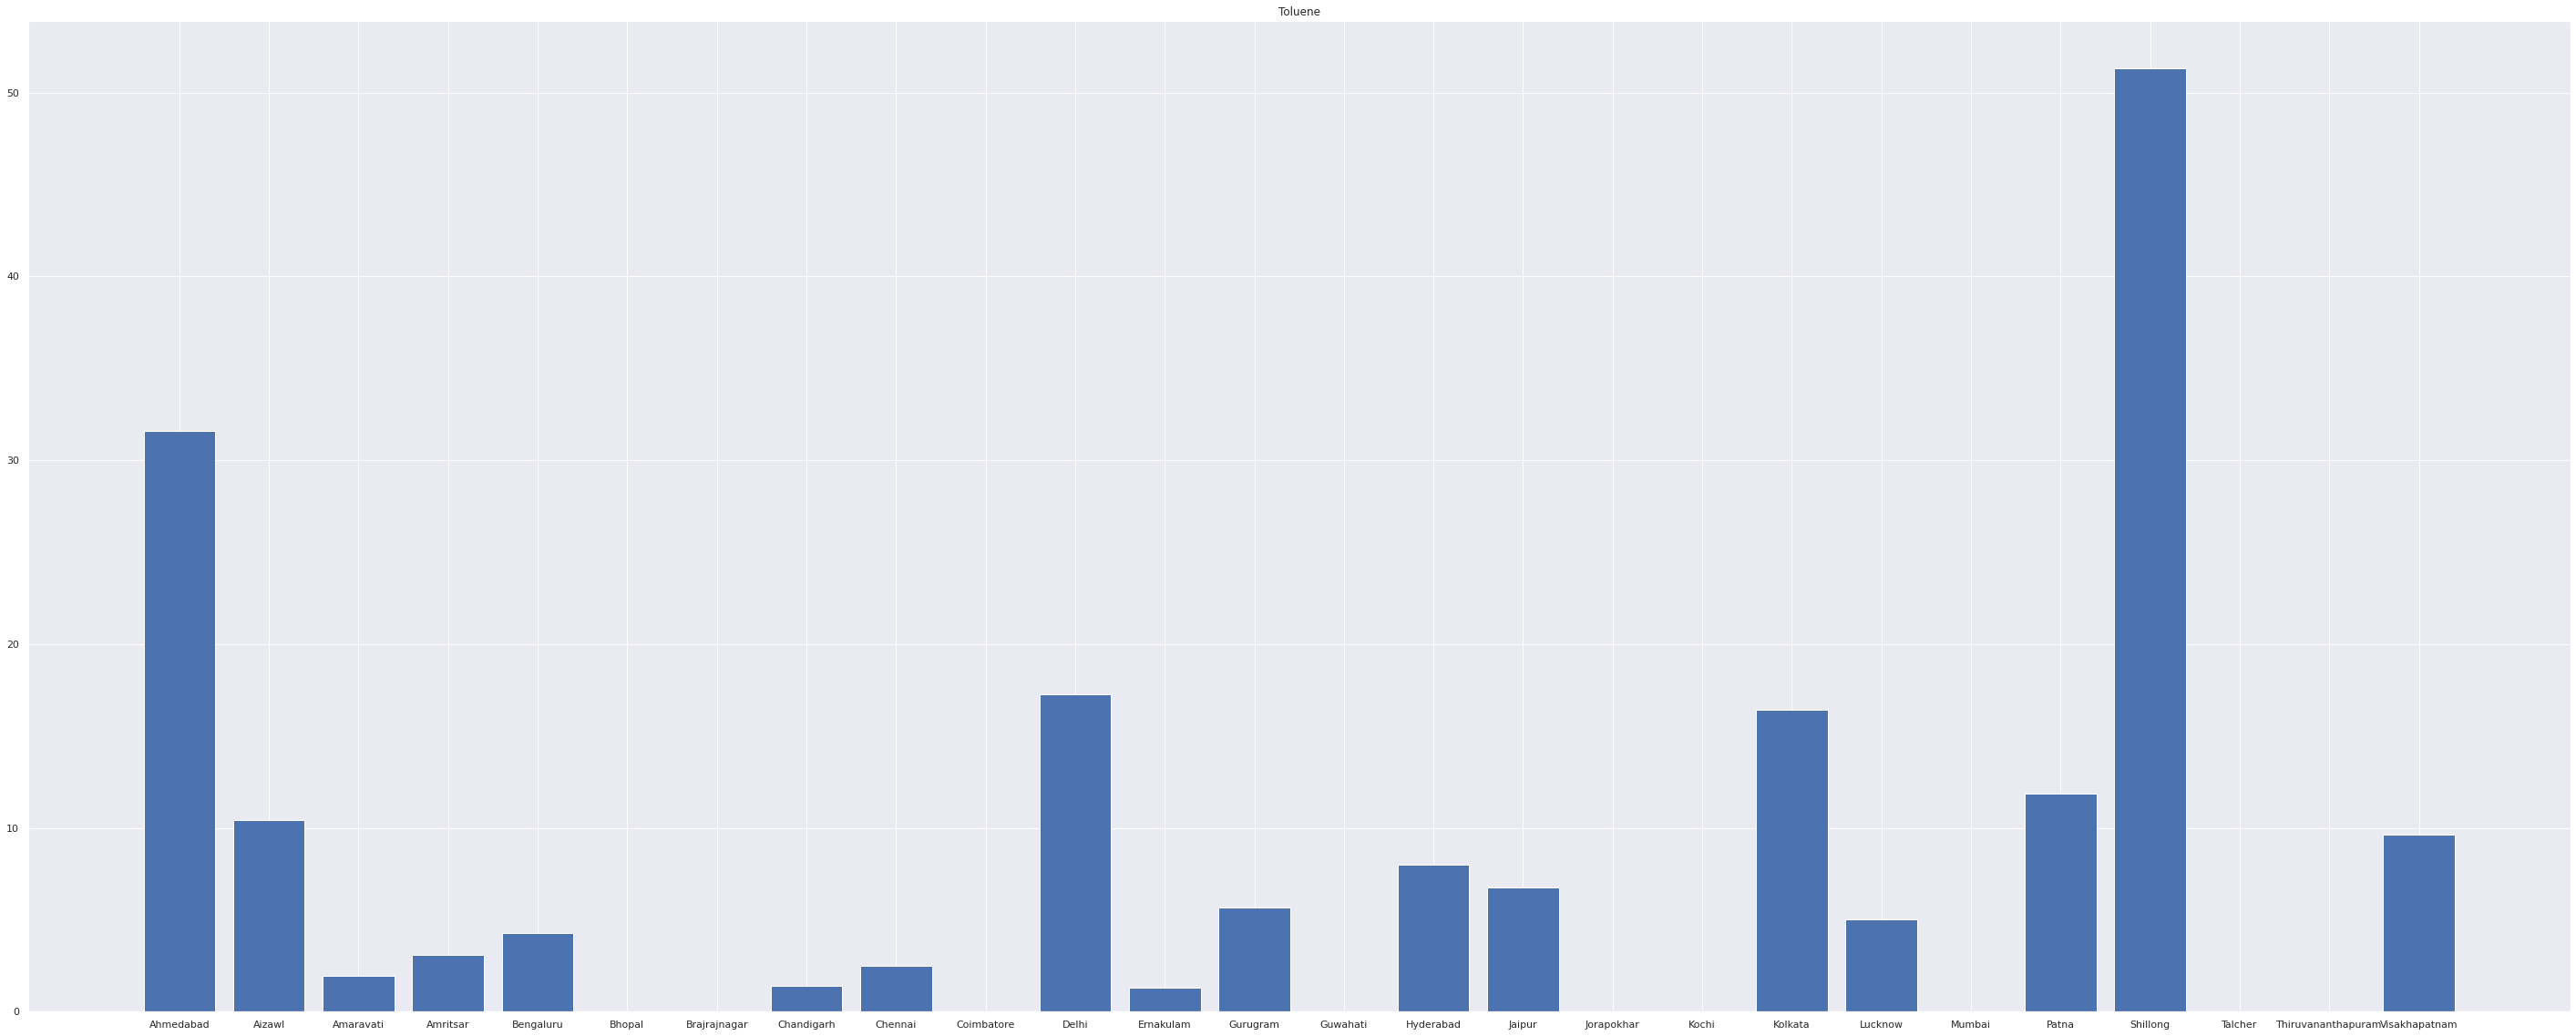

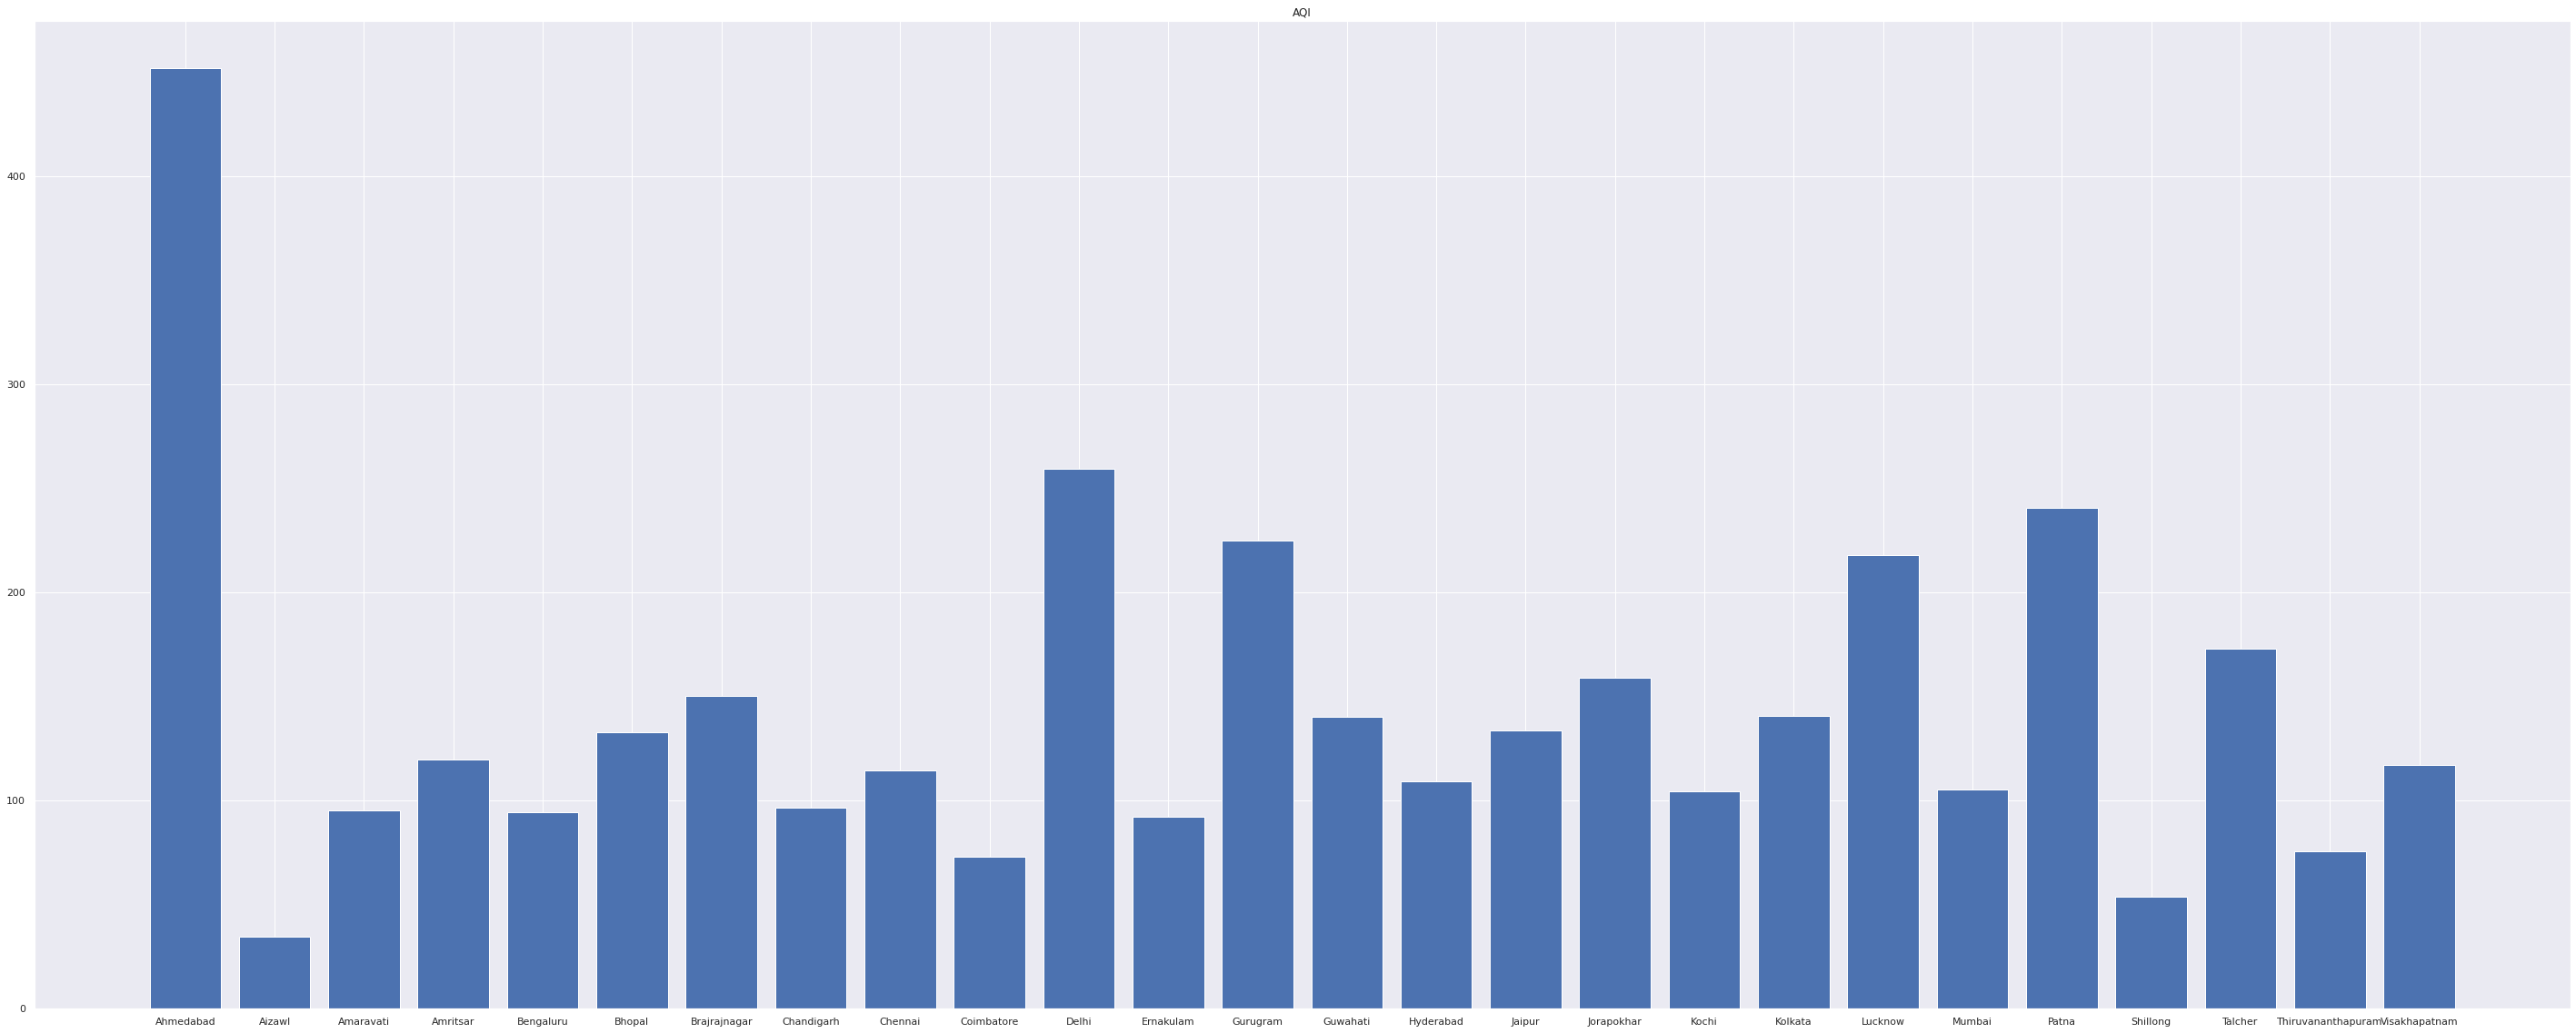

In [ ]:
for i in list(d.keys()):
    fig = plt.figure(figsize = (50, 20))
    plt.bar(list(d[i].keys()),list(d[i].values()))
    plt.title(i)
    plt.show()

From these plots we can make a lot of conclusions. PM2.5 is highest in Patna, PM10 is highest in Delhi, NO is highest in Kochi, NO2 is highest in Ahmedabad, NOx is highest in Kochi, NH3 is highest in Chennai, CO is highest in Ahmedabad, SO2 is highest in Ahmedabad, O3 is highest in Bhopal, Benzene is highest in Shillong, Toluene is highest in Shillong and the overall AQI is highest in Ahmedabad followed by Delhi. From these plots we can see that Delhi and Ahemdabad have a very bad air quality.

In [ ]:
df['Sum']=df.iloc[:, 2:13].sum(axis=1)
print(df.isna().sum())

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
AQI           0
AQI_Bucket    0
Sum           0
dtype: int64


How many data values is being used for each city. On the basis of this find out for which cities the mean median mode etc are more accurate

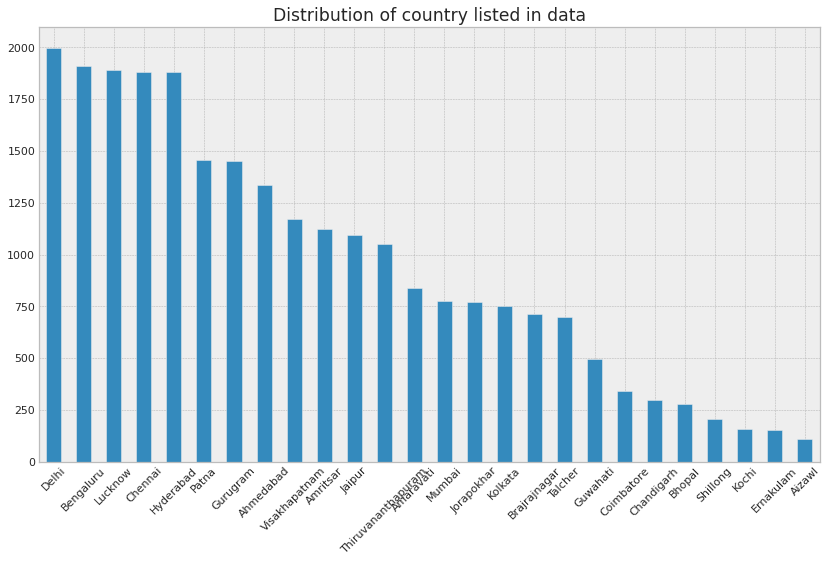

In [ ]:
plt.style.use('bmh')
plt.figure(figsize=(15,5))
ax = df['City'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Owner Name")
plt.xticks(rotation=45)
plt.title('Distribution of country listed in data');
# print(df.groupby('City').count())

From this we know that most cities have data values greater than 500. These will be more accurate than Aizawl or Kochi..

In [ ]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
data={'City':list(df['City'].unique())}
print(data)
longitude = dict()
latitude = dict()

def findGeocode(city):
    try:
        geolocator = Nominatim(user_agent="your_app_name")
          
        return geolocator.geocode(city)
      
    except GeocoderTimedOut:
          
        return findGeocode(city)      
for i in (data['City']):
      
    if findGeocode(i) != None:
        loc = findGeocode(i)
        latitude[i]=(loc.latitude)
        longitude[i]=(loc.longitude)
    else:
        latitude[i]=(np.nan)
        longitude[i]=(np.nan)

{'City': ['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru', 'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore', 'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai', 'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram', 'Visakhapatnam']}


In [ ]:
DATA={'City':list(d['AQI'].keys()),'Average':list(d['AQI'].values()),'latitude':list(latitude.values()),'longitude':list(longitude.values())}
print(len(d['AQI']),len(latitude),len(longitude))
in_aqi=pd.DataFrame.from_dict(DATA)
in_aqi

26 26 26


,City,Average,latitude,longitude
0,Ahmedabad,452.122939,23.021624,72.579707
1,Aizawl,34.765766,23.743524,92.738291
2,Amaravati,95.299643,16.509668,80.518454
3,Amritsar,119.920959,31.634308,74.873679
4,Bengaluru,94.318325,12.976794,77.590082
5,Bhopal,132.827338,23.258486,77.401989
6,Brajrajnagar,150.280505,NaN,NaN
7,Chandigarh,96.498328,30.733442,76.779714
8,Chennai,114.502654,13.083694,80.270186
9,Coimbatore,73.023256,11.001812,76.962842


Which regions have worse air quality in INDIA?

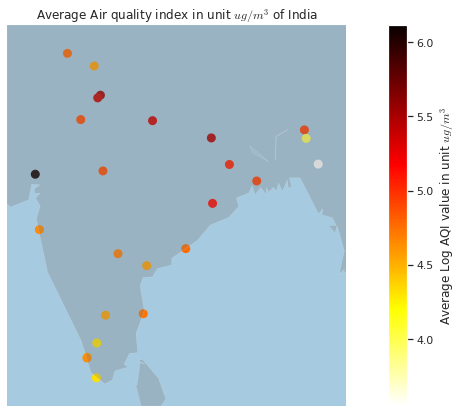

In [ ]:
min_lat = min(list(latitude.values()))-2
max_lat = max(list(latitude.values()))+2
min_lon = min(list(longitude.values()))-2
max_lon = max(list(longitude.values()))+2

plt.figure(figsize=(15,7))
m3 = Basemap(projection='cyl', llcrnrlon=min_lon, urcrnrlon=max_lon, llcrnrlat=min_lat, urcrnrlat=max_lat,
            resolution='c',lat_ts=True)
m3.drawcounties()
m3.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m3.fillcontinents(color='grey', alpha=0.3)
m3.drawcoastlines(linewidth=0.1, color="white")
m3.drawstates()
avg = np.log((in_aqi['Average']))
h = in_aqi['Average']
m3loc = m3(in_aqi['latitude'].tolist(),in_aqi['longitude'])
m3.scatter(m3loc[1],m3loc[0],c = avg,lw=3,alpha=1,cmap='hot_r')
plt.colorbar(label = 'Average Log AQI value in unit $ug/m^3$')
plt.title('Average Air quality index in unit $ug/m^3$ of India');

From the map we can see that most affected areas are Central India whereas Southern India seems least affected which means that it has good air quality

What is the relation between all pollutants quantities and AQI

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

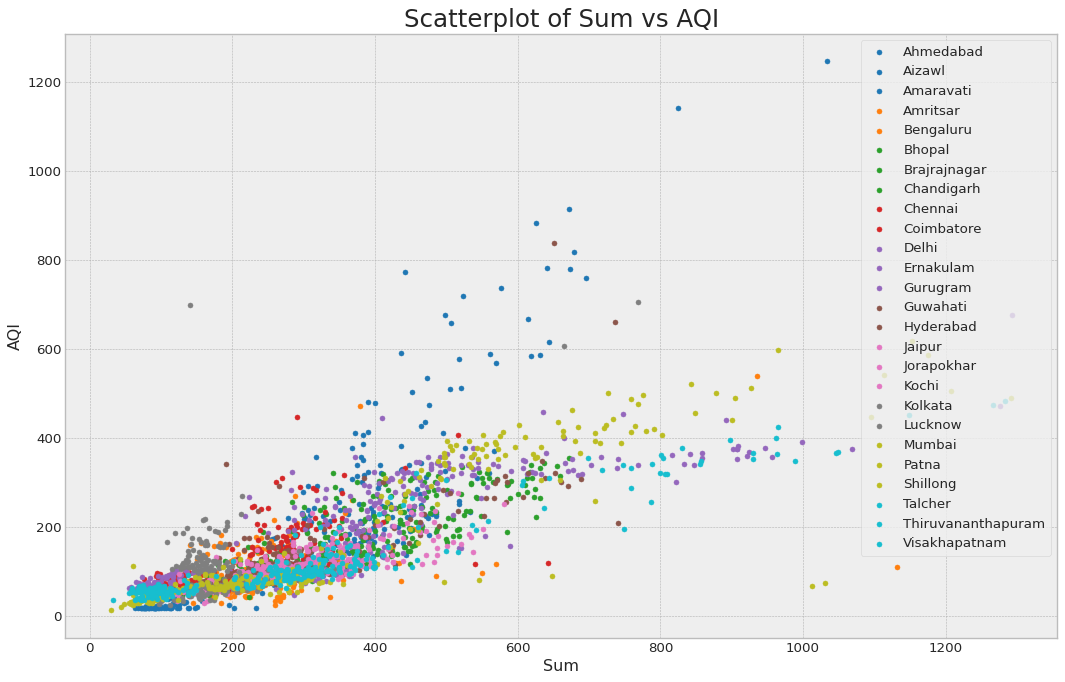

In [ ]:
#Relation between PM2.5 and AQI
categories=np.unique(df['City'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('Sum', 'AQI', 
                data=df.loc[df.City==category, :][:100], 
                s=20, c=colors[i], label=str(category))
plt.gca().set(xlabel='Sum', ylabel='AQI')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Sum vs AQI", fontsize=22)
plt.legend(fontsize=12)    
plt.show()   

There is a little discrepancy and some outliers but we can safely conclude that with increase of all values the AQI also increases

Analyze the correlationship between all the columns 

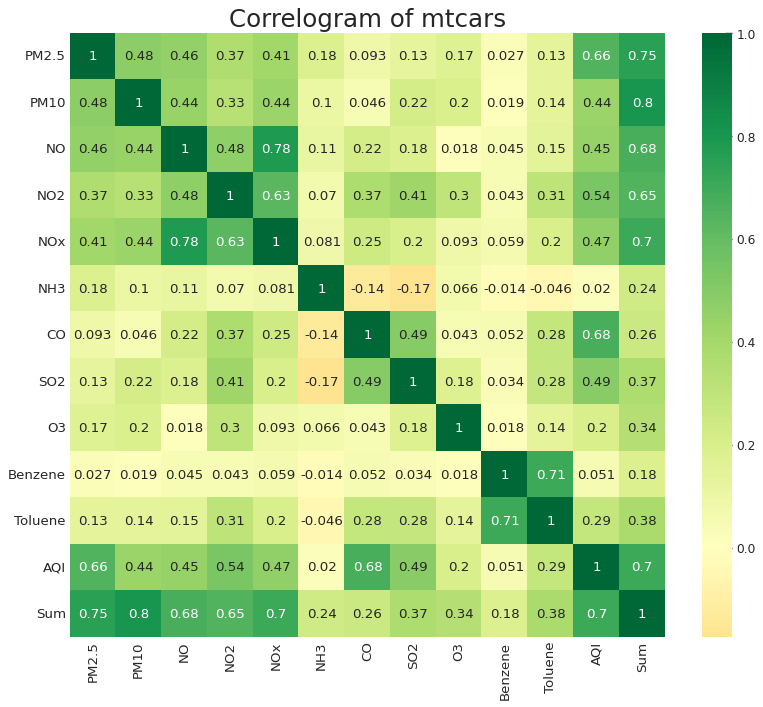

In [ ]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<Figure size 800x640 with 0 Axes>

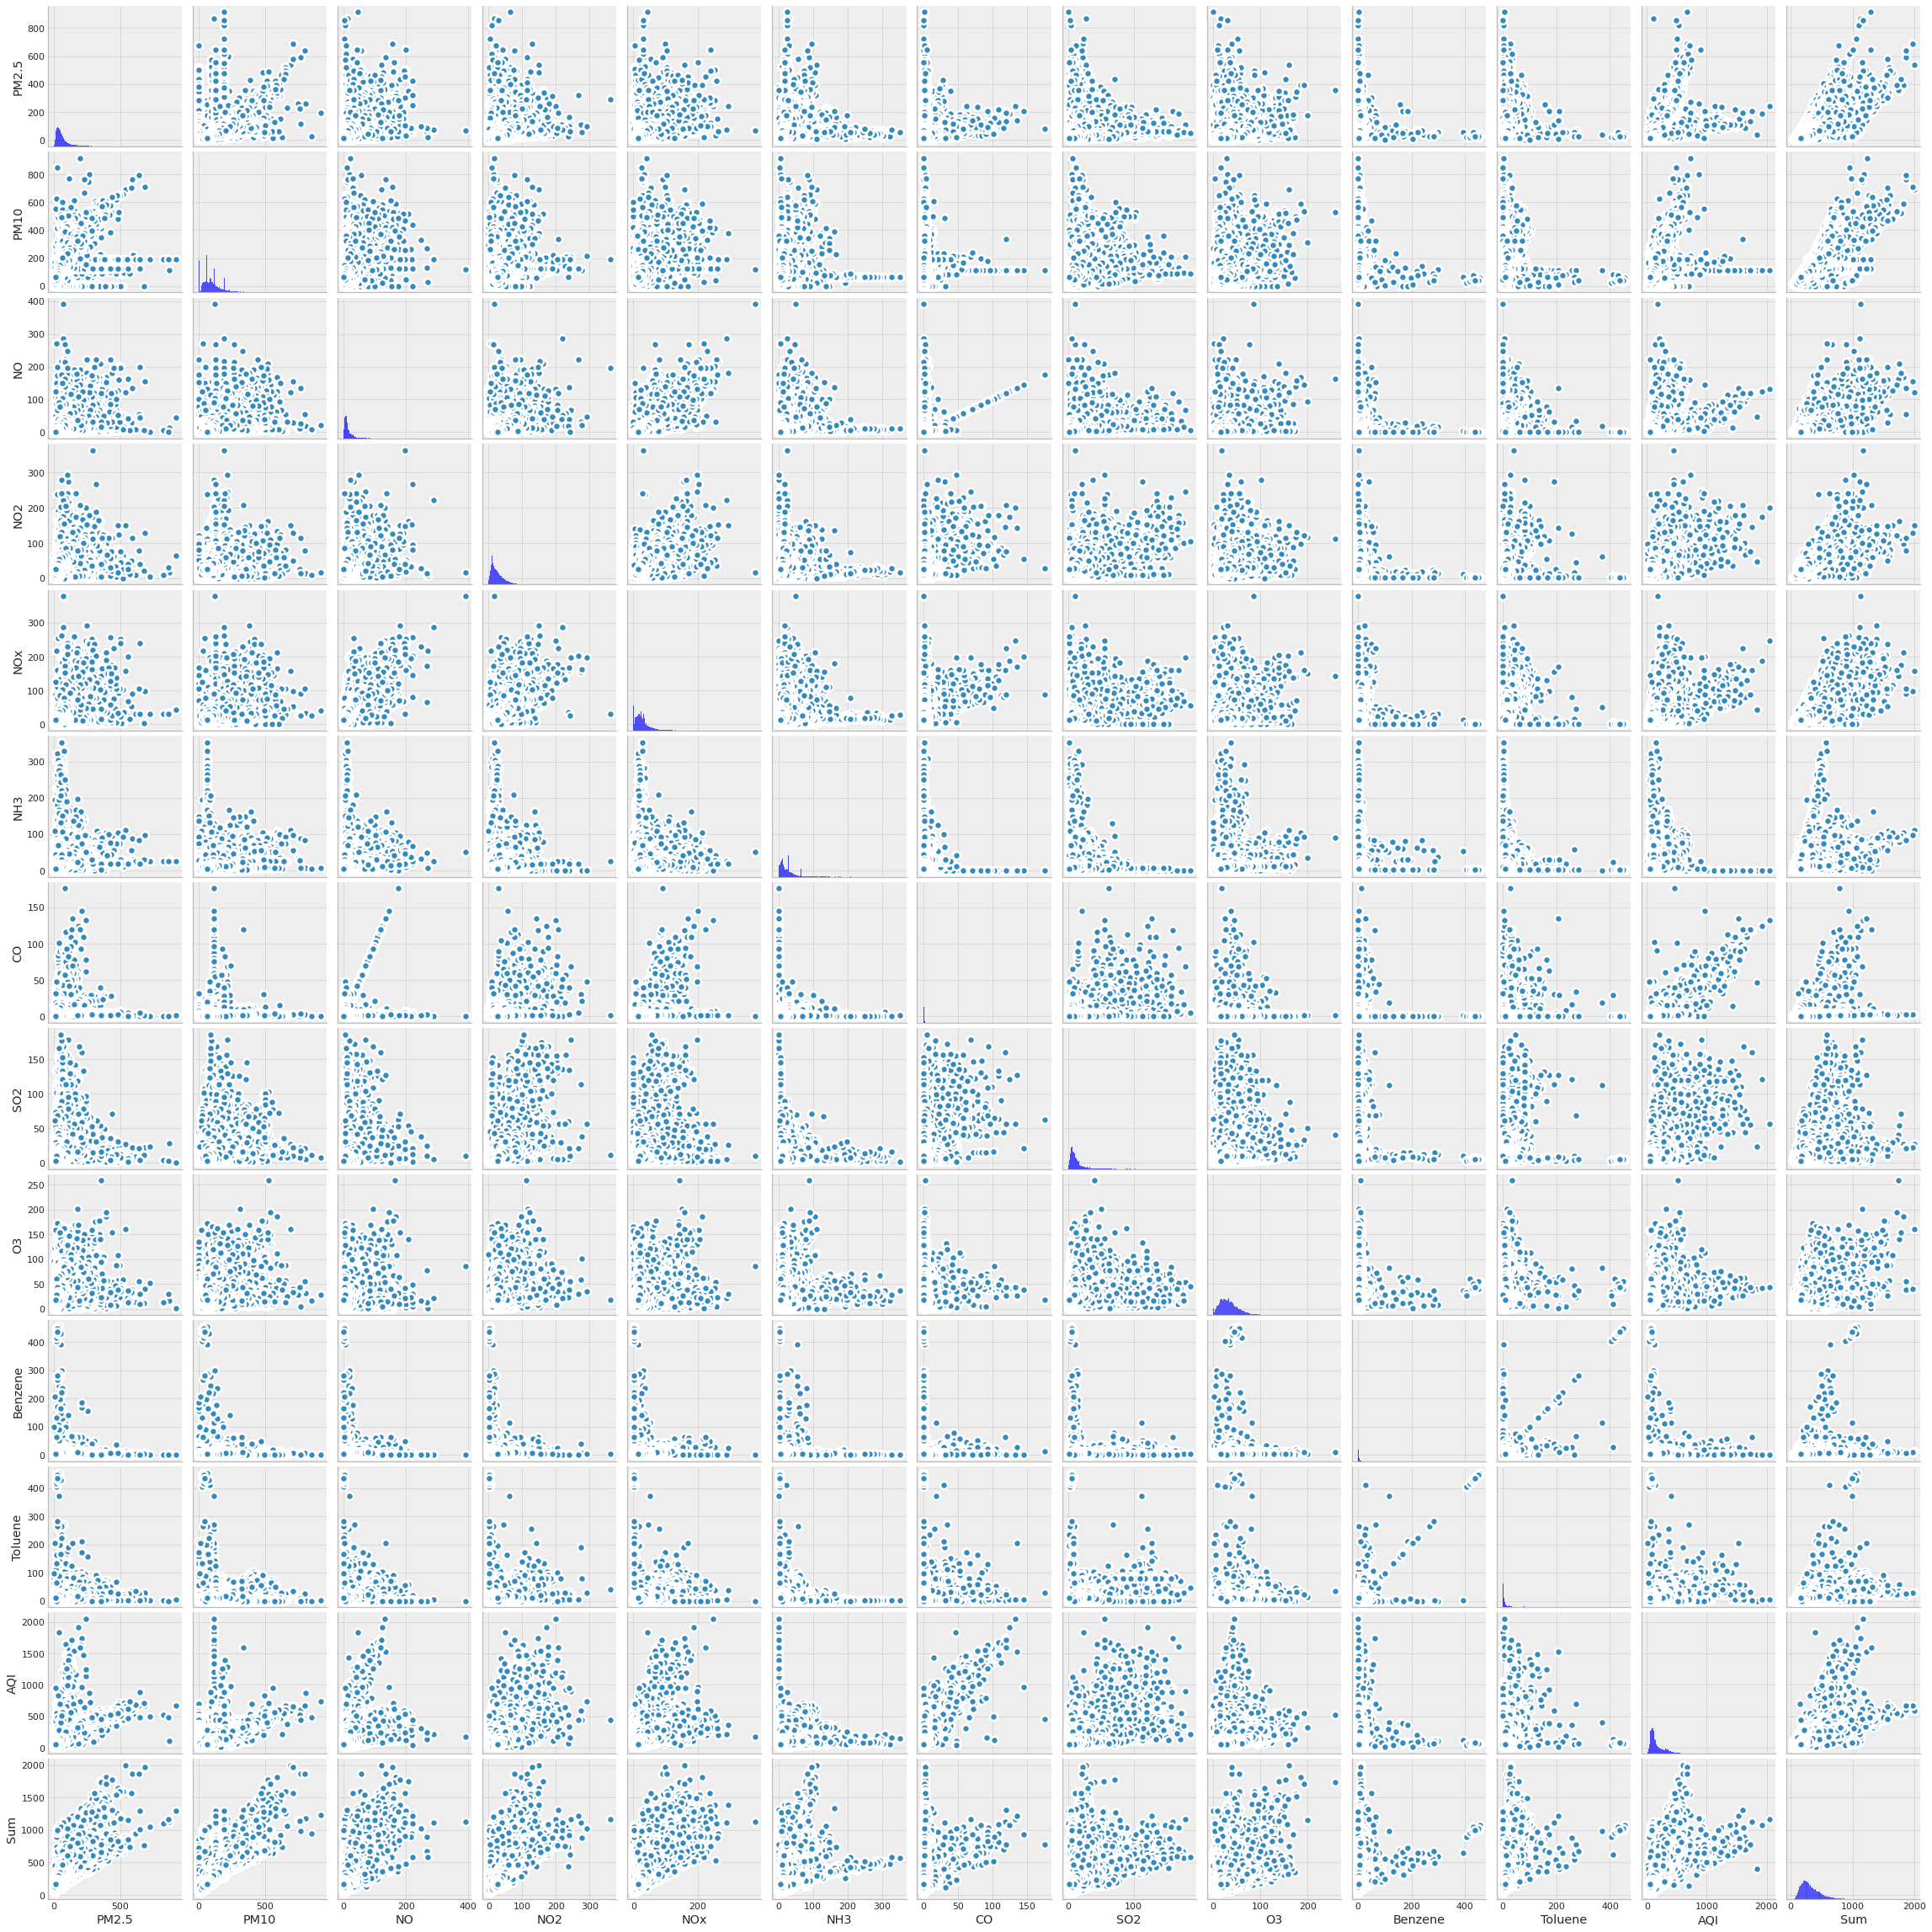

In [ ]:
# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

Pairplot of all two columns in the dataset

Which month/s are the ones where the Air Quality is the worst?

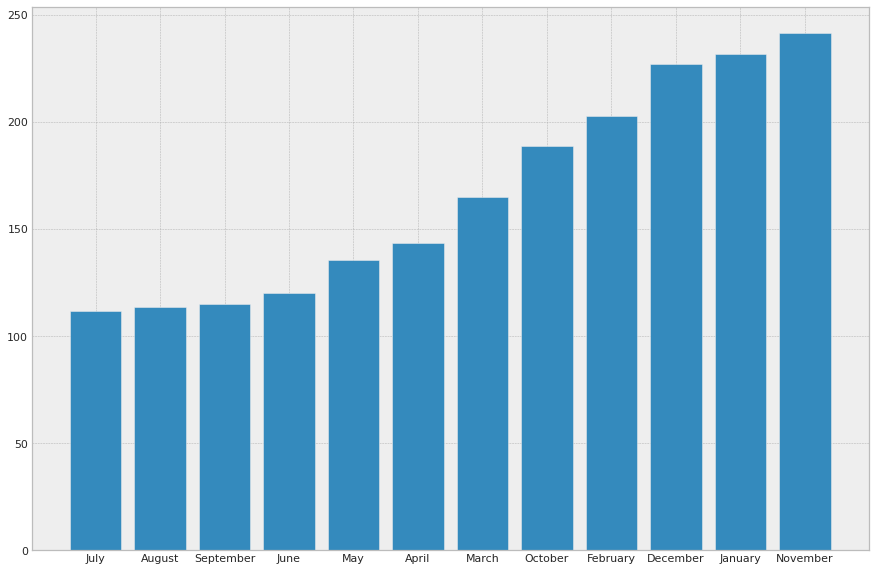

In [ ]:
D_Month=df.groupby(df['Date'].dt.strftime('%B'))['AQI'].mean().sort_values()
fig = plt.figure(figsize = (15, 10))
plt.bar(list(list(D_Month.index)),D_Month)
# plt.title(i)
plt.show()
# print(list(D_Month.index))

As we can see the maximum AQI is From November to January. The highest is during November and one of the obvious reasons for that is because of Diwali. Also from https://www.kent.co.in/blog/winter-and-air-pollution-why-does-air-quality-deteriorate-as-temperature-drops/ -"Winter inversion, valley effect in addition to industrial emissions, vehicular emissions are some of the reasons for the increasing amount of air pollution in winter. Dust storms, crop fires, burning of solid fuels for heating, as well as firecracker-related pollution during Diwali also increases winter pollution."

Which cities generally have good quality air?

['Poor' 'Very Poor' 'Severe' 'Moderate' 'Satisfactory' 'Good']


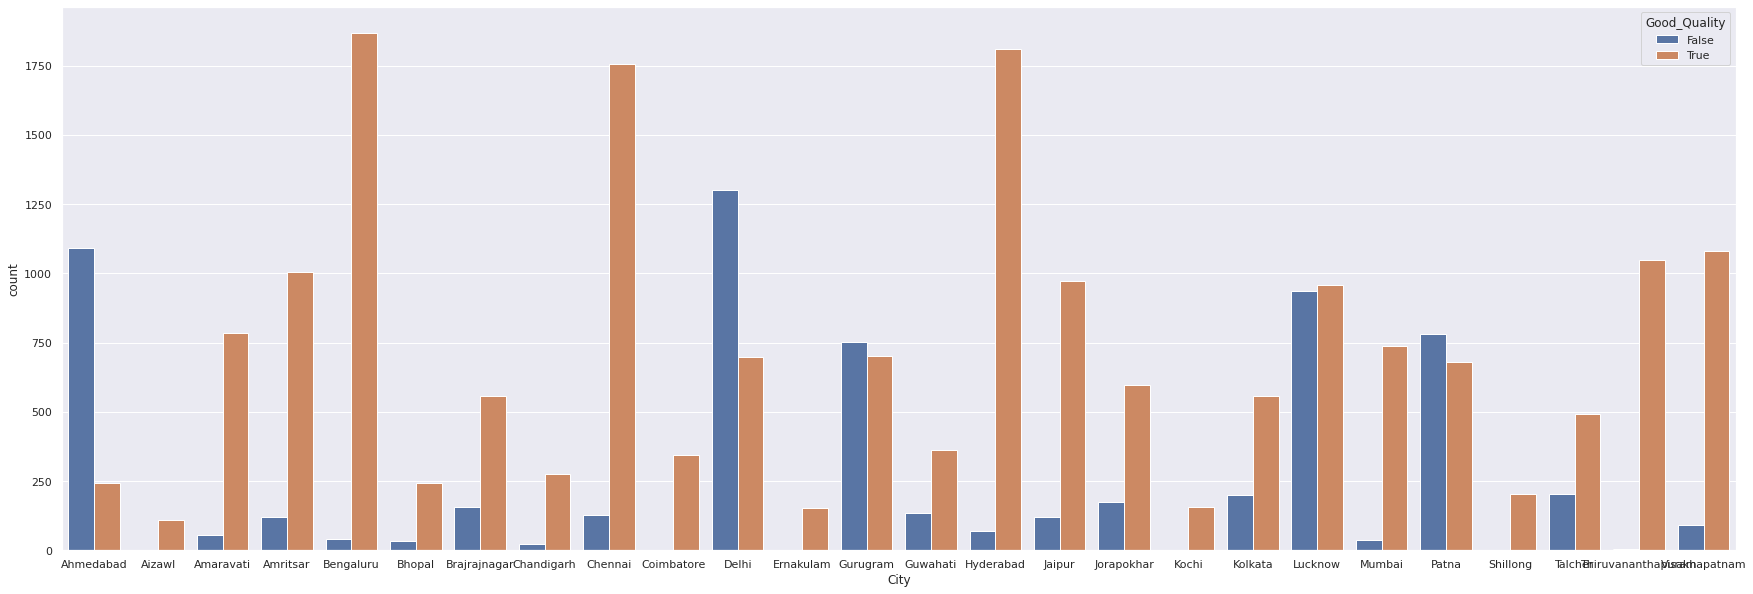

In [ ]:
print(df['AQI_Bucket'].unique())
df['Good_Quality']=df['AQI_Bucket'].apply(lambda x:True if (x in ['Good','Moderate','Satisfactory']) else False)
# print(df['Good_Quality'].isna().sum())
# df=df.drop('Good_Quality',axis=1)
# df1=sns.load_dataset(df)
sns.set(rc={'figure.figsize':(30,10)})
sns.countplot(x="City", hue="Good_Quality",data=df);
# print(df.groupby('City').count())

As you can see Ahemdabad, Delhi and Lucknow are the only ones with more bad quality air on most days than good. There are several reasons for this. As a 2018 study says-"An analysis of the Air Quality Index (AQI) for Ahmedabad has shown that since the beginning of 2018, the highest number of poor air quality days has been recorded in the month of October (up to Oct 24). Of the 24 days of October, 15 days had poor air quality. This means over 60% of the days in October had poor air quality." This small time data is refective of the air condition in Ahemdabad for a really long time. Delhi and Lucknow are lesser but similar affected areas because of the population as well as the power plants and other industrial pollution.

Summary: From the entire process we can summarize that the air pollution is deteriorating for the entire country(even if it's happening slowly). However, we have the potential to change that and even though the data for 2020 and later has not been provided here but the air quality has improved after 2020 and if we follow the right path we can do better.

Future Work: From the datasets we can analyze and find out where there are problems and also use them to resolve the issues. Such as if there is a lot of CO emission in Ahemdabad then take the appropriate steps to reduce them. If the AQI of Delhi is very high then what are the reasons and possible measures to reduce them etc.

In [ ]:
Google colab link- https://colab.research.google.com/drive/1ypKvwIg67zRvZ19yAsLu6Oe5KOu7sQ9Z?usp=sharing 